# Kaggle Titanic Dataset

## 데이터 세부사항 (Data Description)

passengerid: 탑승자 아이디  
survived:0=사망, 1=생존  
pclass: 1=1등석, 2=2등석, 3=3등석  
name: 탑승자 이름  
gender:male=남성, female=여성  
age: 나이  
sibsp: 타이타닉 호에 동승한 자매/배우자의 수  
parch: 타이타닉 호에 동승한 부모/자식의 수  
ticket: 티켓 번호  
fare: 승객 요금  
cabin: 방 호수  
embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴  

# 전역 변수 설정 (Global Variables)

## import library

In [554]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## path

In [2]:
import easydict
import json
args = easydict.EasyDict()

# Dataset 기본 디렉토리 경로 설정
args.default_path = '/Users/jhnam/workspace/playdata/encore21titanic/'

# get train and test dataset path
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'

# get submission path
args.submission_csv = args.default_path+"submission.csv"

# 데이터 분석을 위한 변수들
# random state
args.random_state = 21

# 데이터 불러오기 (Load Titanic Dataset)

In [3]:
org_train = pd.read_csv(args.train_csv)
org_test = pd.read_csv(args.test_csv)

##### train

In [4]:
org_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


##### test

In [5]:
org_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  393 non-null    int64  
 1   pclass       393 non-null    int64  
 2   name         393 non-null    object 
 3   gender       393 non-null    object 
 4   age          310 non-null    float64
 5   sibsp        393 non-null    int64  
 6   parch        393 non-null    int64  
 7   ticket       393 non-null    object 
 8   fare         392 non-null    float64
 9   cabin        97 non-null     object 
 10  embarked     392 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 33.9+ KB


##### passengerid 중복 확인

- passengerid 의 중복값이 없는 것 확인

In [6]:
org_train['passengerid'].nunique(), org_train.shape[0]

(916, 916)

##### drop passengerid

In [7]:
org_train.drop('passengerid', axis=1, inplace=True)
org_train.shape

(916, 11)

##### set index passengerid to org_test

In [8]:
org_test.set_index(['passengerid'], inplace=True)
org_test.shape

(393, 10)

# 타겟 데이터 확인

## survived

In [9]:
target = pd.Categorical(org_train['survived'])
target = target.rename_categories(['Died', 'Survived'])

target.describe()

,counts,freqs
categories,,
Died,570,0.622271
Survived,346,0.377729


죽은 사람과 산 사람의 비율이 대략 2:1 인 것을 확인할 수 있다.

# EDA

## 데이터 확인

In [10]:
org_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [11]:
org_test.head()

,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


## 수치형 데이터 분석

### 수치형 데이터 확인

In [12]:
df_number = org_train.select_dtypes(include=np.number)
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  916 non-null    int64  
 1   pclass    916 non-null    int64  
 2   age       736 non-null    float64
 3   sibsp     916 non-null    int64  
 4   parch     916 non-null    int64  
 5   fare      916 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 43.1 KB


In [13]:
df_number.head()

,survived,pclass,age,sibsp,parch,fare
0,0,2,NaN,0,0,12.8750
1,0,3,NaN,0,0,7.7500
2,1,1,52.0,1,1,93.5000
3,1,3,27.0,0,0,7.7958
4,0,2,44.0,1,0,26.0000


### 통계적 분석

In [14]:
df_number.describe()

,survived,pclass,age,sibsp,parch,fare
count,916.000000,916.000000,736.000000,916.000000,916.000000,916.000000
mean,0.377729,2.292576,29.698370,0.507642,0.361354,32.402710
std,0.485084,0.838675,14.185627,1.044866,0.828054,50.506411
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.017700
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### age

In [15]:
print("** df_number - age 통계적 분석 **")

print(f"총 합계 : {df_number['age'].sum()}")
print(f"평균 : {df_number['age'].mean()}")
print(f"중앙값 : {df_number['age'].median()}")
print(f"분산 : {df_number['age'].var()}")
print(f"표준편차 : {df_number['age'].std()}")
print(f"최솟값 : {df_number['age'].min()}")
print(f"최댓값 : {df_number['age'].max()}")
print(f"분위수 계산\n{df_number['age'].quantile([0.25, 0.5, 0.75])}")

** df_number - age 통계적 분석 **
총 합계 : 21858.0
평균 : 29.69836956521739
중앙값 : 28.0
분산 : 201.23202237207926
표준편차 : 14.185627316833022
최솟값 : 0.17
최댓값 : 80.0
분위수 계산
0.25    21.0
0.50    28.0
0.75    38.0
Name: age, dtype: float64


### 첨도 분석

#### fare

In [16]:
# 첨도 분석
df_number['fare'].kurt()

31.16578434563386

<Axes: ylabel='Frequency'>

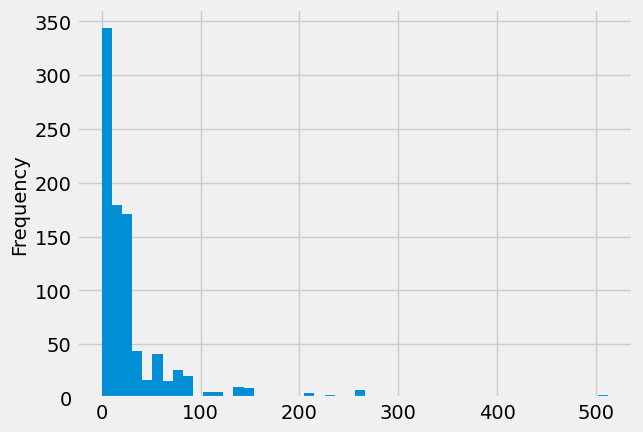

In [17]:
df_number['fare'].plot.hist(bins=50)

<Axes: >

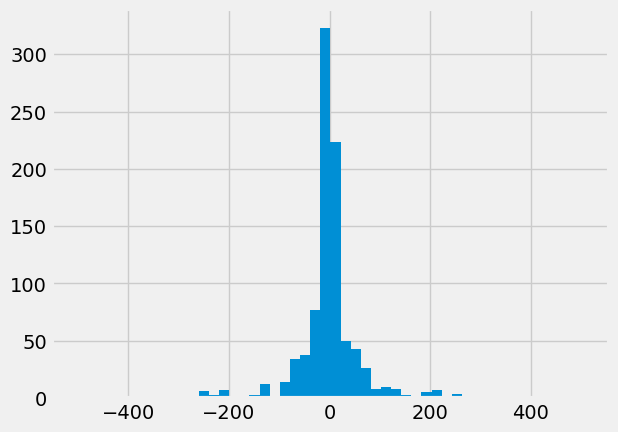

In [18]:
# diff(): 한 객체 내에서 열과 열 / 행과 행의 차이를 출력하는 메서드 입니다.
df_number['fare'].diff().hist(bins=50)

### 왜도 분석

##### fare

In [19]:
df_number['fare'].mean(), df_number['fare'].median(), df_number['fare'].mode().values[0]

(32.40271048034934, 14.4583, 13.0)

<Axes: ylabel='Frequency'>

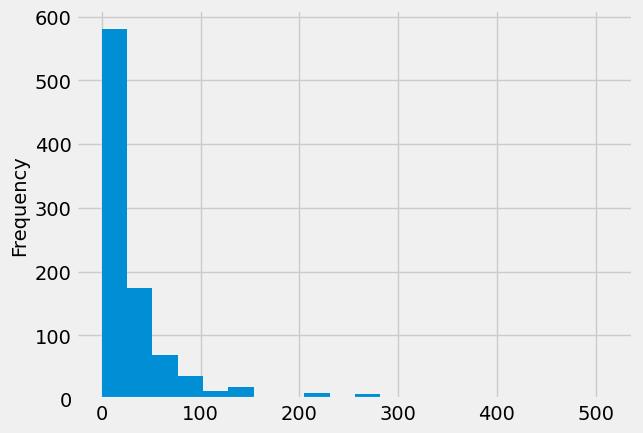

In [20]:
df_number['fare'].plot.hist(bins=20)

<Axes: >

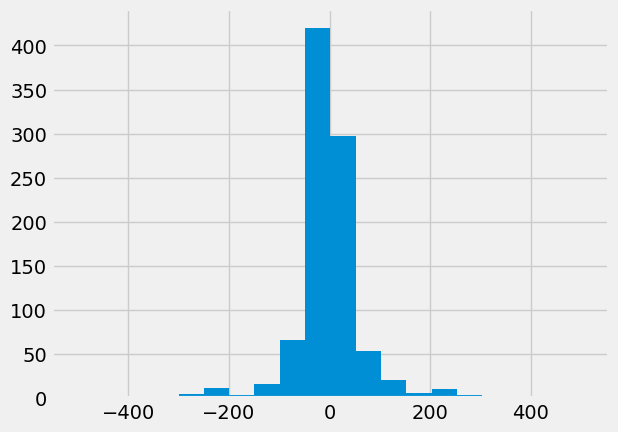

In [21]:
df_number['fare'].diff().hist(bins=20)

### 이상치 분석

<Axes: ylabel='age'>

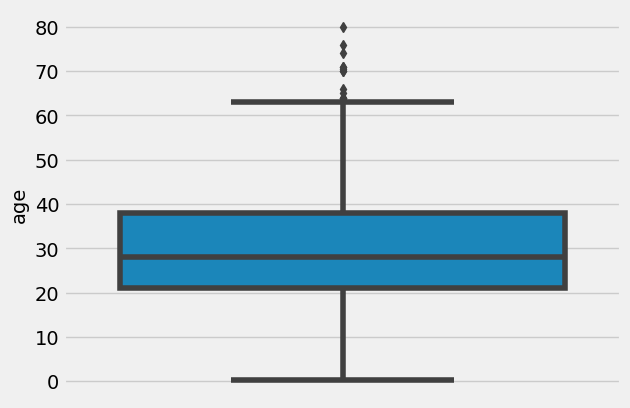

In [22]:
sns.boxplot(y=df_number['age'], data=org_train)

<Axes: xlabel='survived', ylabel='age'>

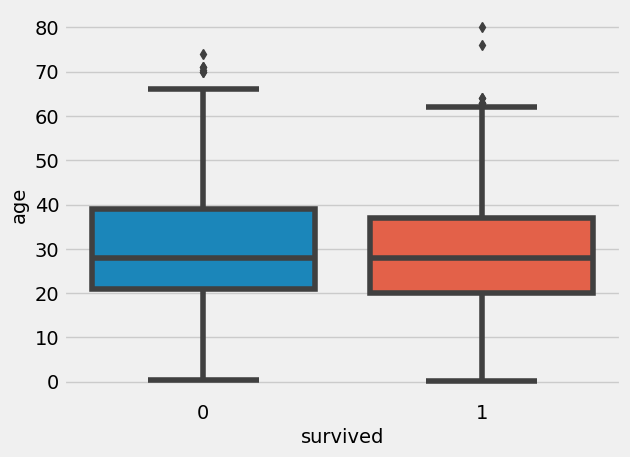

In [23]:
sns.boxplot(x=org_train['survived'], y=org_train['age'], data=org_train)

### 상관 관계 확인 

#### heatmap

heatmap 분석 방법  

- 주로 수치형 데이터를 분석할 때 사용한다.  


- corr() 함수는 Pearson Correlation Coefficient 를 구하는 함수  
  보통 절댓값이 0.4 이상이면 상관 관계를 갖는다고 본다.


- annot=True  
  직접적인 수치를 확인할 수 있다.
  

- mask 설정을 통해 반만 잘라서 확인할 수 있다.  


- 두 상관 관계가 높다는 것이고 서로 영향을 준다는 의미일 뿐  
  하나가 증가하면 반드시 다른 하나가 증가하는 것은 아니다.  

In [24]:
org_train.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.250455,-0.030330,0.002924,0.084269,0.224068
pclass,-0.250455,1.000000,-0.407876,0.069781,0.060049,-0.541277
age,-0.030330,-0.407876,1.000000,-0.255825,-0.169893,0.139101
sibsp,0.002924,0.069781,-0.255825,1.000000,0.386491,0.162144
parch,0.084269,0.060049,-0.169893,0.386491,1.000000,0.181826
fare,0.224068,-0.541277,0.139101,0.162144,0.181826,1.000000


<Axes: >

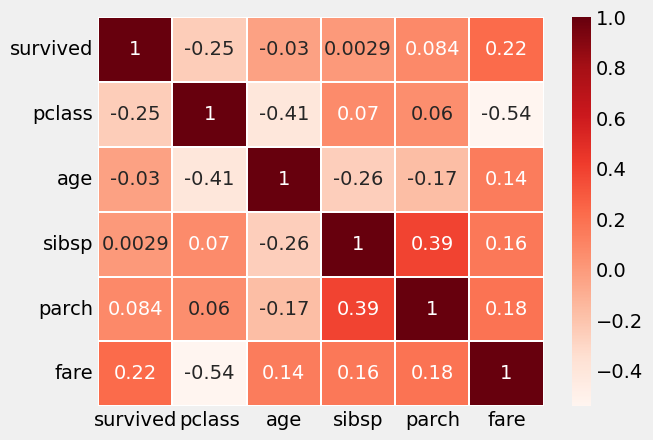

In [25]:
sns.heatmap(org_train.corr(), annot=True, linewidths=0.2, cmap = "Reds")

<Axes: >

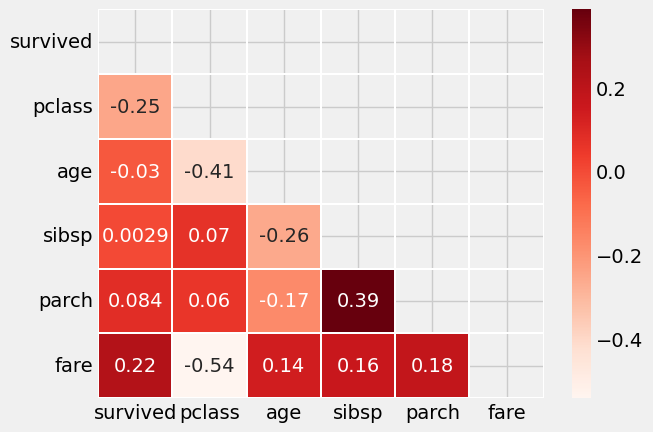

In [26]:
mask=np.zeros_like(org_train.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(org_train.corr(), annot=True, mask=mask, linewidths=0.2, cmap = "Reds")

<Axes: >

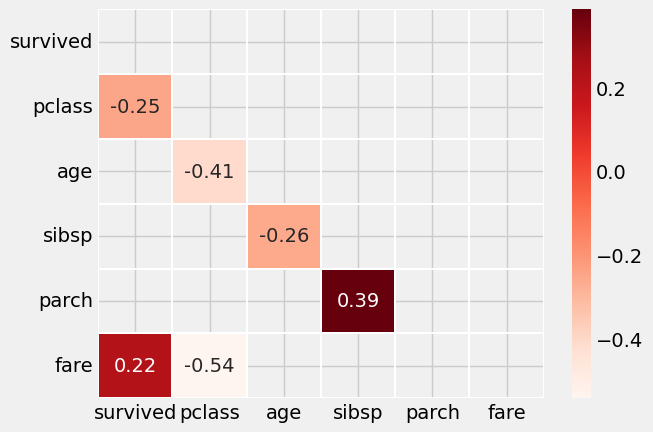

In [27]:
corr = org_train.corr()
mask=np.zeros_like(org_train.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr[((corr >= 0.2) | (corr <= -0.2)) & (corr != 1)], mask=mask,annot=True, linewidths=0.2, cmap = "Reds")

#### pclass

- 1등석에 탄 사람의 생존률이 높은 것을 확인할 수 있다.

Text(0.5, 1.0, 'Survived by pclass')

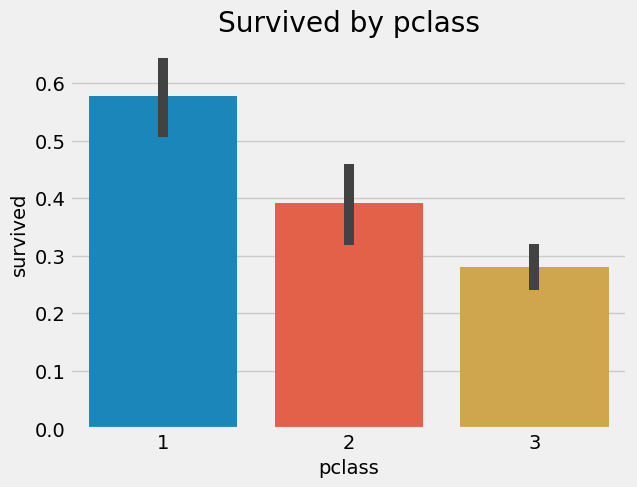

In [28]:
ps = sns.barplot(x = "pclass", y = "survived", data = df_number)
ps.set_title("Survived by pclass")

In [29]:
pd.crosstab(df_number["pclass"], df_number["survived"], margins = True) 

survived,0,1,All
pclass,,,
1,96,131,227
2,118,76,194
3,356,139,495
All,570,346,916


In [30]:
pd.crosstab(df_number["pclass"], df_number["survived"], margins = True, normalize= "all") 

survived,0,1,All
pclass,,,
1,0.104803,0.143013,0.247817
2,0.128821,0.082969,0.211790
3,0.388646,0.151747,0.540393
All,0.622271,0.377729,1.000000


In [31]:
pclass1 = df_number[df_number.pclass == 1]['survived'].value_counts(normalize=True).values[0]*100
pclass2 = df_number[df_number.pclass == 2]['survived'].value_counts(normalize=True).values[1]*100
pclass3 = df_number[df_number.pclass == 3]['survived'].value_counts(normalize=True).values[1]*100

print("Lets look at some satistical data!\n")
print("Pclaas-1: {:.1f}% People Survived".format(pclass1))
print("Pclaas-2: {:.1f}% People Survived".format(pclass2))
print("Pclaas-3: {:.1f}% People Survived".format(pclass3))

Lets look at some satistical data!

Pclaas-1: 57.7% People Survived
Pclaas-2: 39.2% People Survived
Pclaas-3: 28.1% People Survived


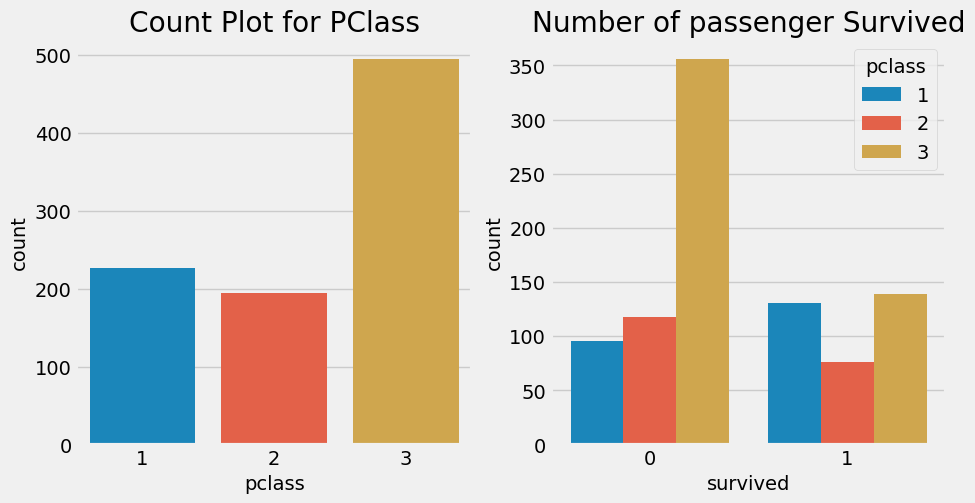

In [32]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(x='pclass', data=df_number)
plt.title('Count Plot for PClass');

plt.subplot(1,2,2)
sns.countplot(x="survived", hue="pclass", data=df_number)
plt.title('Number of passenger Survived');

#### age

In [33]:
df_number['sub_age'] = df_number['age'] // 10

In [34]:
pd.crosstab(df_number["sub_age"], df_number["survived"], margins = True, normalize="all").T

sub_age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,All
survived,,,,,,,,,,
0,0.039402,0.077446,0.217391,0.133152,0.089674,0.029891,0.014946,0.008152,0.000000,0.610054
1,0.036685,0.058424,0.114130,0.097826,0.043478,0.025815,0.010870,0.001359,0.001359,0.389946
All,0.076087,0.135870,0.331522,0.230978,0.133152,0.055707,0.025815,0.009511,0.001359,1.000000


In [35]:
pd.crosstab(df_number["sub_age"], df_number["pclass"], margins = True, normalize="all").T

sub_age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,All
pclass,,,,,,,,,,
1,0.002717,0.019022,0.050272,0.074728,0.062500,0.036685,0.014946,0.005435,0.001359,0.267663
2,0.014946,0.031250,0.086957,0.063859,0.028533,0.014946,0.006793,0.001359,0.000000,0.248641
3,0.058424,0.085598,0.194293,0.092391,0.042120,0.004076,0.004076,0.002717,0.000000,0.483696
All,0.076087,0.135870,0.331522,0.230978,0.133152,0.055707,0.025815,0.009511,0.001359,1.000000


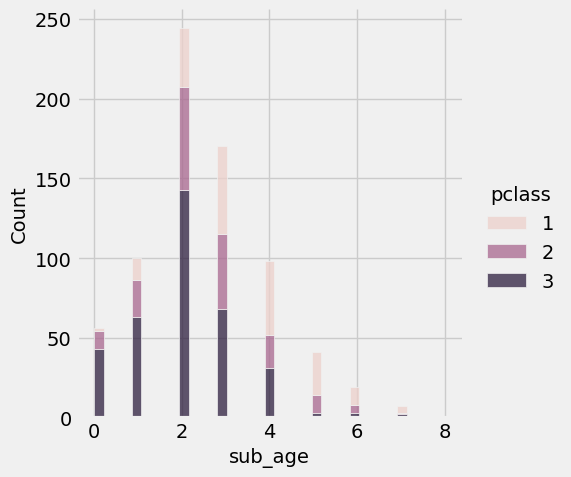

In [36]:
ps = sns.displot(x = "sub_age", hue="pclass", data = df_number, multiple="stack")

In [37]:
df_number['sub_age'].describe()

count    736.000000
mean       2.535326
std        1.456434
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: sub_age, dtype: float64

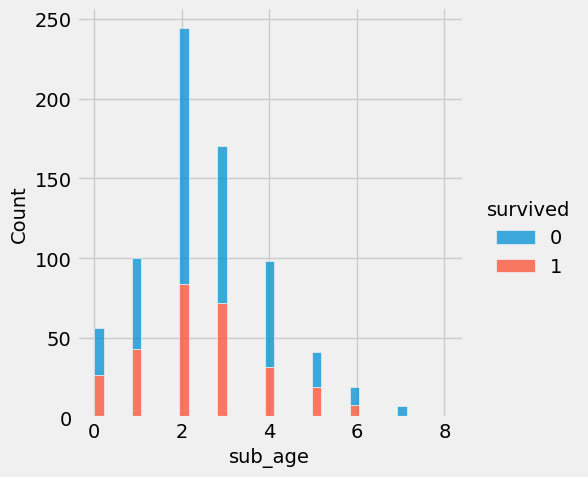

In [38]:
ps = sns.displot(x = "sub_age", hue="survived", data = df_number, multiple="stack")

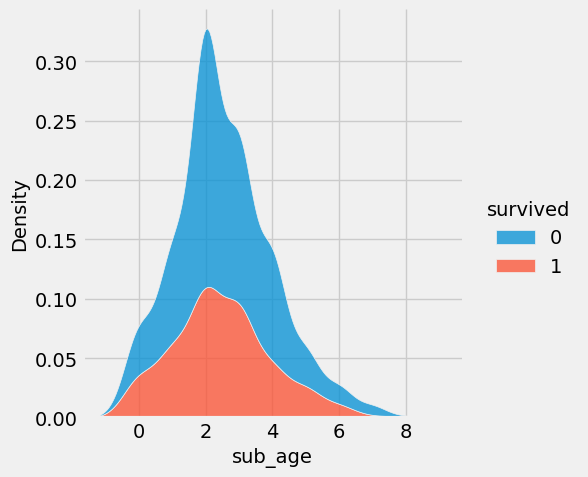

In [39]:
sns.displot(x = "sub_age", hue="survived", data = df_number, multiple="stack", kind="kde")

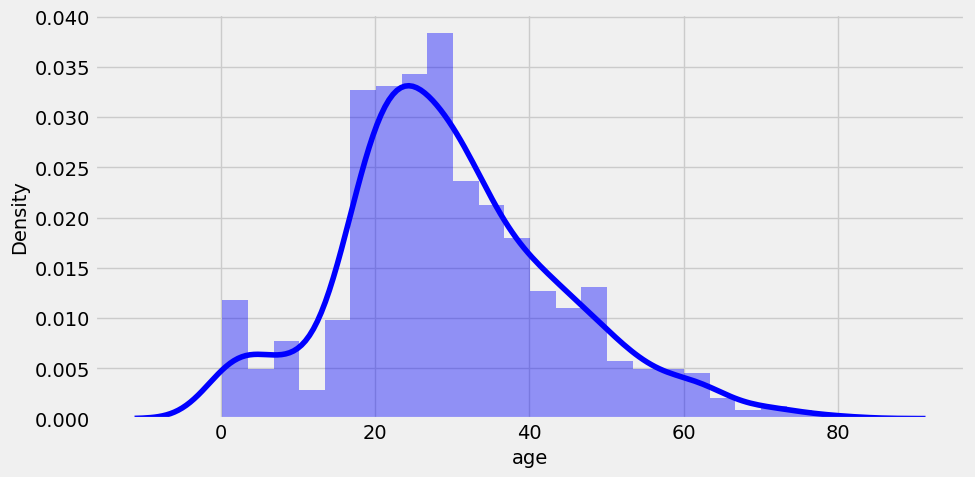

In [40]:
plt.figure(figsize=(10,5))
ages = sns.distplot(df_number['age'], bins=24, color='b')

In [41]:
age_range = [0, 5, 12, 18, 29, 49, 64, 100]
age_labels = ["baby", "child", "teenager", "adult", "middle", "senior", "older"]

df_number['age_group'] = pd.cut(df_number['age'], age_range, labels=age_labels)

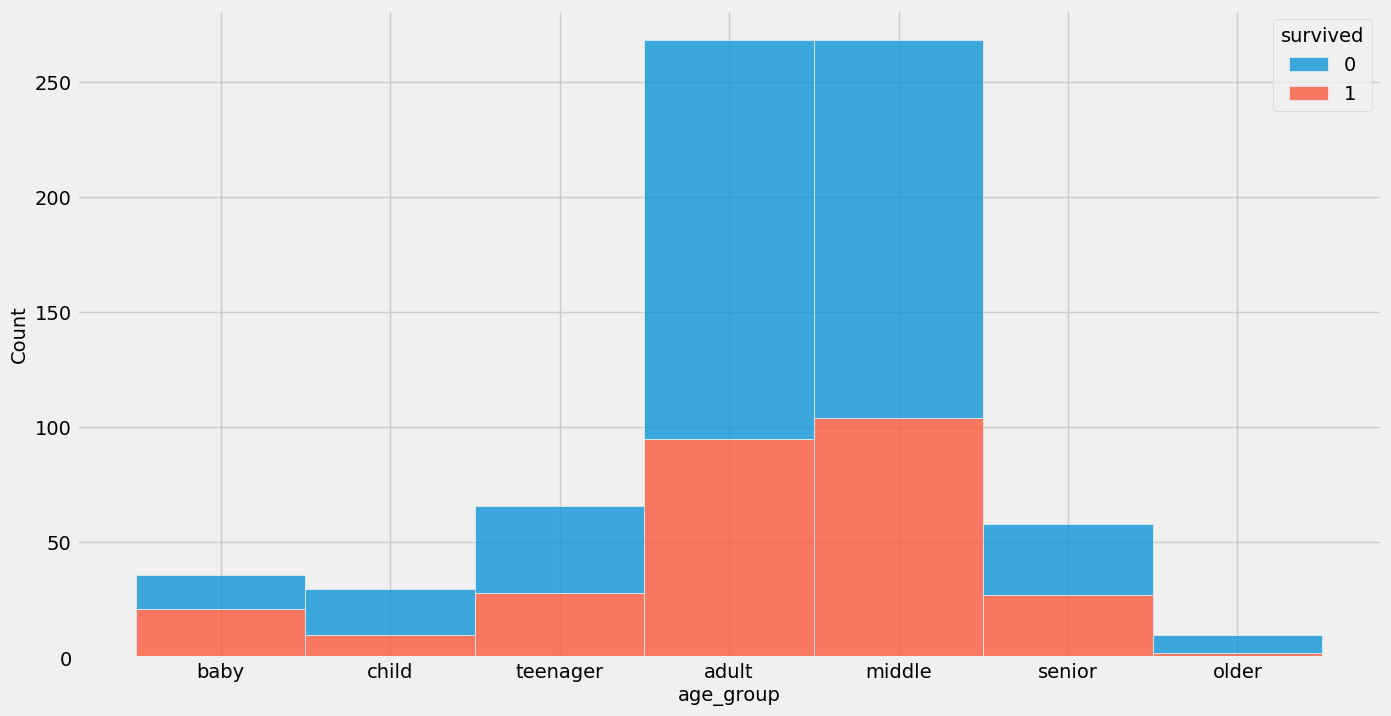

In [42]:
plt.figure(figsize=(15,8))
agp = sns.histplot(x = "age_group", hue="survived", data = df_number, multiple="stack")

In [43]:
df_number[df_number['age_group']=="bady"]

,survived,pclass,age,sibsp,parch,fare,sub_age,age_group


<Axes: xlabel='sub_age', ylabel='sibsp'>

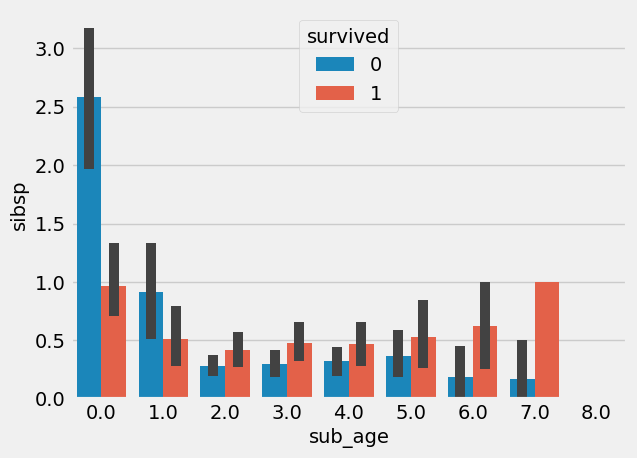

In [44]:
sns.barplot(y = "sibsp", x = "sub_age", hue="survived", data = df_number)

<Axes: xlabel='age_group', ylabel='sibsp'>

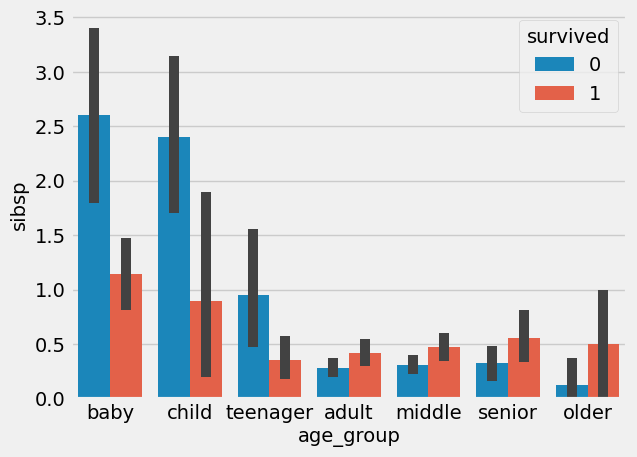

In [45]:
sns.barplot(y = "sibsp", x = "age_group", hue="survived", data = df_number)

#### sibsp

<Axes: xlabel='sibsp', ylabel='count'>

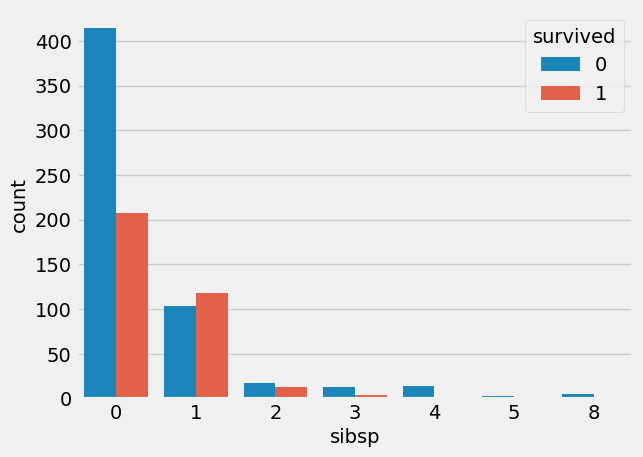

In [46]:
sns.countplot(x='sibsp', hue='survived', data=df_number)

#### parch

<Axes: xlabel='parch', ylabel='count'>

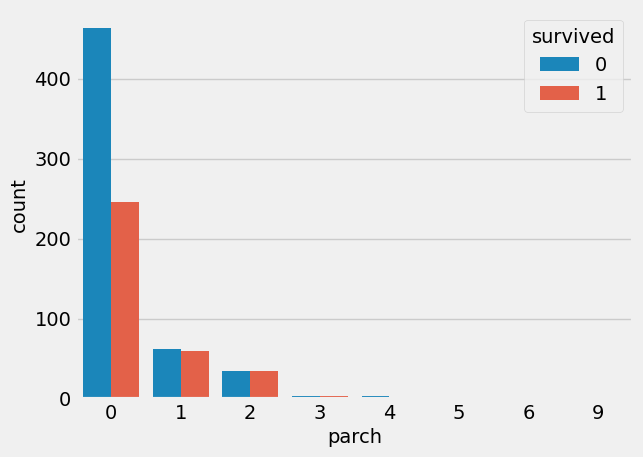

In [47]:
sns.countplot(x='parch', hue='survived', data=df_number)

#### sibsp + parch

<Axes: xlabel='family_size', ylabel='count'>

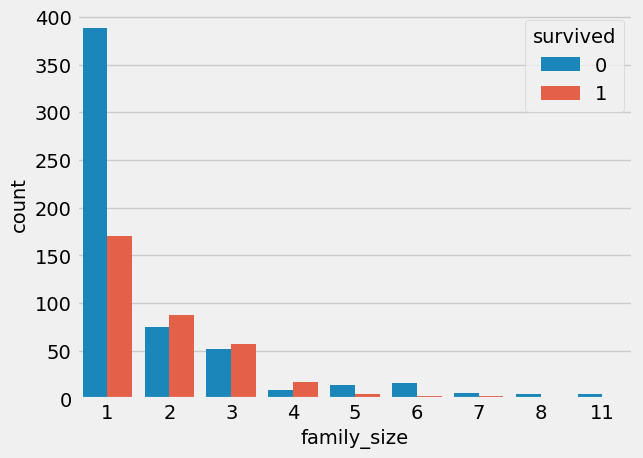

In [48]:
df_number['family_size'] = df_number['sibsp'] + df_number['parch'] + 1

sns.countplot(x = "family_size", hue = "survived", data = df_number)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '11')])

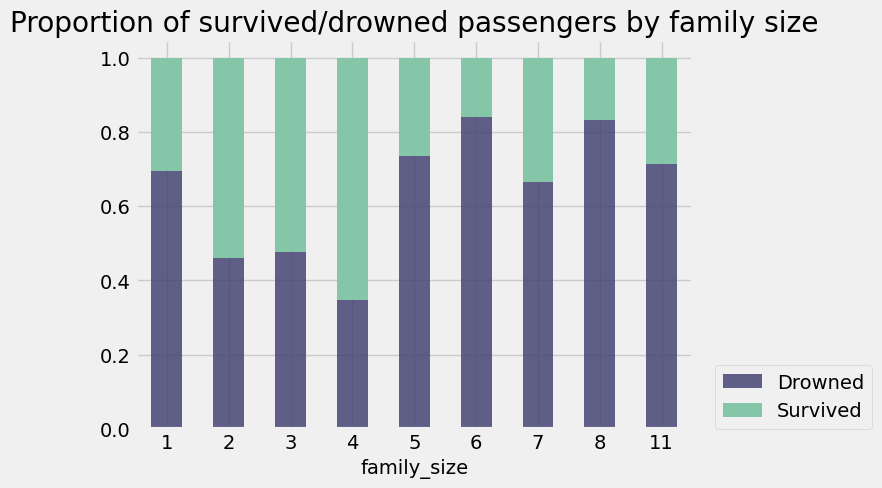

In [49]:
d = df_number.groupby('family_size')['survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True')
plt.title('Proportion of survived/drowned passengers by family size')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

#### fare

In [50]:
fare_split = [-0.001, 7.896, 14.458, 30.018, 513]

for i in range(1, len(fare_split)):
    df_number.loc[(fare_split[i-1]<df_number['fare'])&(df_number['fare']<fare_split[i]), 'fare_group'] = i

In [51]:
pd.crosstab(df_number["fare_group"], df_number["survived"], margins = True, normalize="all").T

fare_group,1.0,2.0,3.0,4.0,All
survived,,,,,
0,0.192140,0.177948,0.141921,0.110262,0.622271
1,0.060044,0.068777,0.109170,0.139738,0.377729
All,0.252183,0.246725,0.251092,0.250000,1.000000


<Axes: xlabel='fare_group', ylabel='count'>

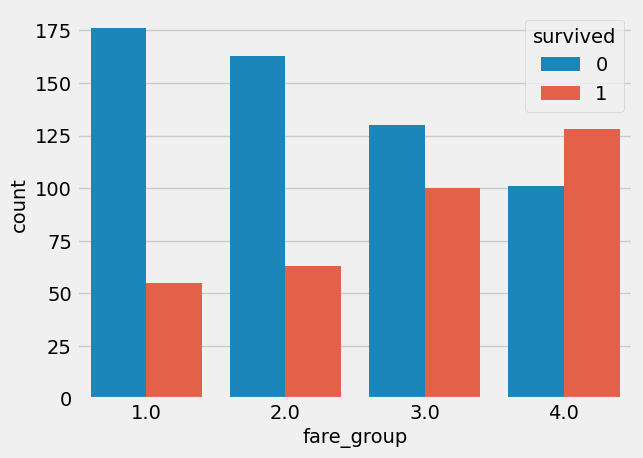

In [52]:
sns.countplot(x='fare_group', hue='survived', data=df_number)

## 범주형 데이터 분석

### 범주형 데이터 확인

In [53]:
df_object = org_train.select_dtypes(exclude=np.number)
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      916 non-null    object
 1   gender    916 non-null    object
 2   ticket    916 non-null    object
 3   cabin     198 non-null    object
 4   embarked  915 non-null    object
dtypes: object(5)
memory usage: 35.9+ KB


In [54]:
df_object = df_object.join(df_number['survived']) # survived 추가
df_object['survived'] = df_object['survived'].astype('object') # 데이터 타입 변경
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      916 non-null    object
 1   gender    916 non-null    object
 2   ticket    916 non-null    object
 3   cabin     198 non-null    object
 4   embarked  915 non-null    object
 5   survived  916 non-null    object
dtypes: object(6)
memory usage: 43.1+ KB


In [55]:
df_object.head()

,name,gender,ticket,cabin,embarked,survived
0,"Wheeler, Mr. Edwin Frederick""""",male,SC/PARIS 2159,NaN,S,0
1,"Henry, Miss. Delia",female,382649,NaN,Q,0
2,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,12749,B69,S,1
3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,350043,NaN,S,1
4,"Hold, Mr. Stephen",male,26707,NaN,S,0


In [56]:
df_object.describe()

,name,gender,ticket,cabin,embarked,survived
count,916,916,916,198,915,916
unique,915,2,703,146,3,2
top,"Connolly, Miss. Kate",male,CA. 2343,G6,S,0
freq,2,589,7,4,645,570


### 통계적 분석

#### embarked

In [57]:
print(f"고유값 개수 : {df_object['embarked'].nunique()}")
print(f"고유값 : {df_object['embarked'].unique()}")
print(f"최빈값 : {df_object['embarked'].mode().values[0]}")
print(f"범주별 개수\n{df_object['embarked'].value_counts()}")
print(f"범주별 비율\n{df_object['embarked'].value_counts(normalize=True)}")

고유값 개수 : 3
고유값 : ['S' 'Q' 'C' nan]
최빈값 : S
범주별 개수
S    645
C    189
Q     81
Name: embarked, dtype: int64
범주별 비율
S    0.704918
C    0.206557
Q    0.088525
Name: embarked, dtype: float64


### 교차 분석

pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

- index: 행으로 그룹화할 값
- columns: 열로 그룹화할 값
- rownames: 행 이름
- colnames: 열 이름
- values: 두 행/열에 따라 집계할 값(반드시 aggfunc와 함께 사용)
- aggfunc: 집계 함수(mean, sum 등)
- margins: True인 경우, 행/열의 소계값이 함게 산출
- dropna: NaN을 포함하지 않고 반환(디폴트: True)
- normalize: 개수가 아닌 비율로 표시
  - index: 행을 기준으로 비율 표시
  - columns: 열을 기준으로 비율 표시
  - all: 전체 기준으로 비율 표시

#### gender & survived

- 여성보다 남성의 생존률이 더 낮은 것을 확인할 수 있음

따라서, 성별이 생존률에 많은 영향을 주는 것을 확인할 수 있음  

In [58]:
pd.crosstab(df_object["gender"],df_object["survived"],margins = True)

survived,0,1,All
gender,,,
female,54,273,327
male,516,73,589
All,570,346,916


In [59]:
# 전체 기준 데이터 비율
pd.crosstab(df_object["gender"], df_object["survived"],margins=True, normalize= "all") 

survived,0,1,All
gender,,,
female,0.058952,0.298035,0.356987
male,0.563319,0.079694,0.643013
All,0.622271,0.377729,1.000000


전체 기준  

- 여성 29.8% 생존, 0.05% 사망  
- 남성 0.07% 생존, 56.3% 사망  

In [60]:
# index 기준 데이터 비율
pd.crosstab(df_object["gender"],df_object["survived"],margins=True, normalize= "index")

survived,0,1
gender,,
female,0.165138,0.834862
male,0.876061,0.123939
All,0.622271,0.377729


인덱스 기준  

- 여성 83.48% 생존, 16.51% 사망  
- 남성 12.39% 생존, 87.60% 사망  

Text(0.5, 1.0, 'Survived by Gender')

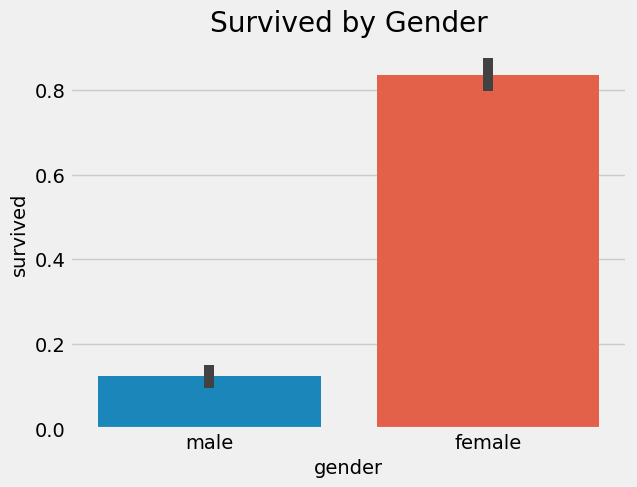

In [61]:
sbp = sns.barplot(x = "gender", y = "survived", data = df_object)
sbp.set_title("Survived by Gender")

Text(0.5, 1.0, 'Survived passenger under age 21')

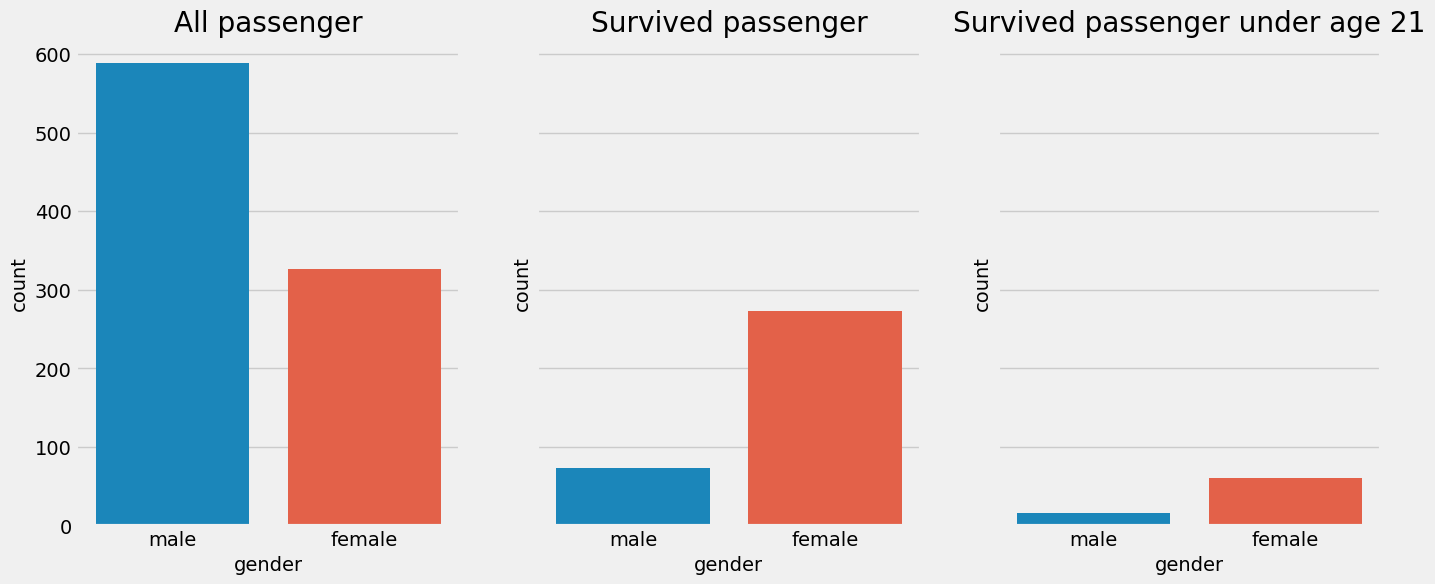

In [62]:
fig, ax =plt.subplots(1,3 , figsize=(15, 6) , sharex='col', sharey='row')
a = sns.countplot(x = 'gender' , data= df_object , ax = ax[0] , order=['male' , 'female'])
b = sns.countplot(x = 'gender' , data= df_object[df_object['survived'] == 1] , ax = ax[1] , order=['male' , 'female'])
c = sns.countplot(x = 'gender' , data= df_object[ ((df_number['age'] < 21) & (df_object['survived'] == 1)) ] , order=['male' , 'female'])
ax[0].set_title('All passenger')
ax[1].set_title('Survived passenger')
ax[2].set_title('Survived passenger under age 21')

#### ticket

In [63]:
df_object['ticket'].nunique()

703

#### name

In [64]:
df_object['title'] = df_object['name'].str.extract('([A-Za-z]+)\.')
    
df_object['title'].value_counts()

Mr          528
Miss        185
Mrs         138
Master       42
Rev           6
Dr            5
Col           3
Major         2
Don           1
Ms            1
Jonkheer      1
Mlle          1
Countess      1
Capt          1
Sir           1
Name: title, dtype: int64

In [65]:
df_object['title'] = df_object['title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [66]:
df_object['title'].value_counts()

Mr        528
Miss      185
Mrs       138
Master     42
Other      23
Name: title, dtype: int64

In [67]:
pd.crosstab(df_object["title"],df_object["survived"],margins=True, normalize= "all")

survived,0,1,All
title,,,
Master,0.032751,0.013100,0.045852
Miss,0.039301,0.162664,0.201965
Mr,0.513100,0.063319,0.576419
Mrs,0.019651,0.131004,0.150655
Other,0.017467,0.007642,0.025109
All,0.622271,0.377729,1.000000


<Axes: xlabel='title', ylabel='Count'>

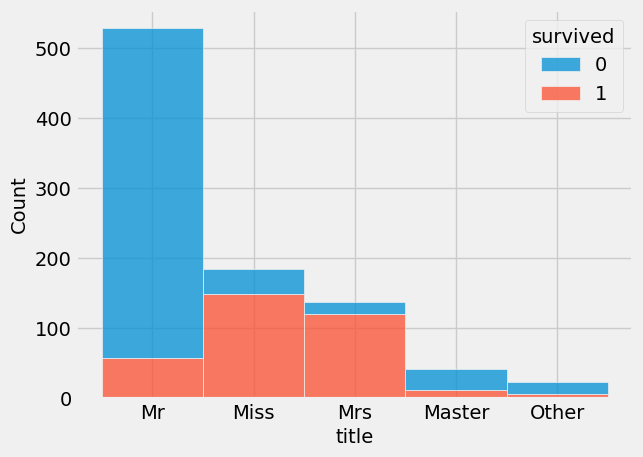

In [68]:
sns.histplot(x = "title", hue = "survived", data = df_object, multiple="stack")

#### cabin

In [69]:
df_object['cabin'].describe()

count     198
unique    146
top        G6
freq        4
Name: cabin, dtype: object

In [70]:
df_object['cabin'].unique()[:10]

array([nan, 'B69', 'A34', 'D28', 'B96 B98', 'B37', 'C54', 'D20', 'D9',
       'A11'], dtype=object)

In [71]:
df_object['cabin'].str.get(0)

0      NaN
1      NaN
2        B
3      NaN
4      NaN
      ... 
911    NaN
912    NaN
913    NaN
914    NaN
915    NaN
Name: cabin, Length: 916, dtype: object

In [72]:
df_object['cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'unknown').unique()

array(['unknown', 'B', 'A', 'D', 'C', 'E', 'F', 'G', 'T'], dtype=object)

In [73]:
df_object['deck'] = df_object['cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'unknown')
df_object['deck']

0      unknown
1      unknown
2            B
3      unknown
4      unknown
        ...   
911    unknown
912    unknown
913    unknown
914    unknown
915    unknown
Name: deck, Length: 916, dtype: object

Text(0.5, 1.0, 'Survived by deck')

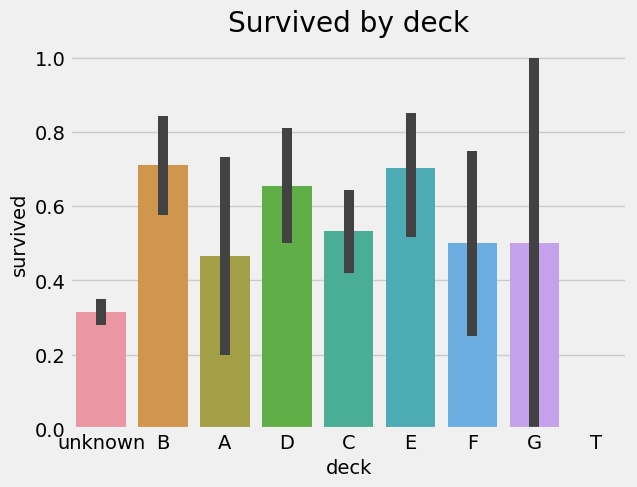

In [74]:
ds = sns.barplot(x = "deck", y = "survived", data = df_object)
ds.set_title("Survived by deck")

In [75]:
df_object.loc[df_object['deck'] == 'T', 'deck'] = 'A'
    
df_object['deck'] = df_object['deck'].replace(['A', 'B', 'C'], 'ABC')
df_object['deck'] = df_object['deck'].replace(['D', 'E'], 'DE')
df_object['deck'] = df_object['deck'].replace(['F', 'G'], 'FG')

In [76]:
df_object['deck'].unique()

array(['unknown', 'ABC', 'DE', 'FG'], dtype=object)

In [77]:
df_object['deck'].value_counts()

unknown    718
ABC        123
DE          59
FG          16
Name: deck, dtype: int64

Text(0.5, 1.0, 'Survived by deck')

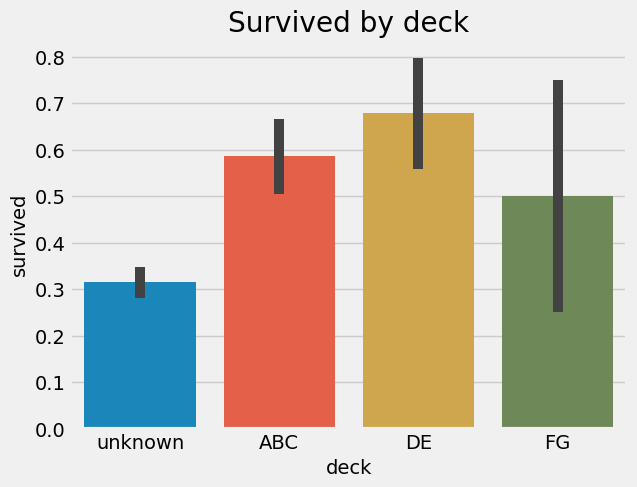

In [78]:
ds = sns.barplot(x = "deck", y = "survived", data = df_object)
ds.set_title("Survived by deck")

#### embarked

In [79]:
print(f"embarked unique = {df_object['embarked'].nunique()}")
print(f"embarked nique = {df_object['embarked'].unique()}")

embarked unique = 3
embarked nique = ['S' 'Q' 'C' nan]


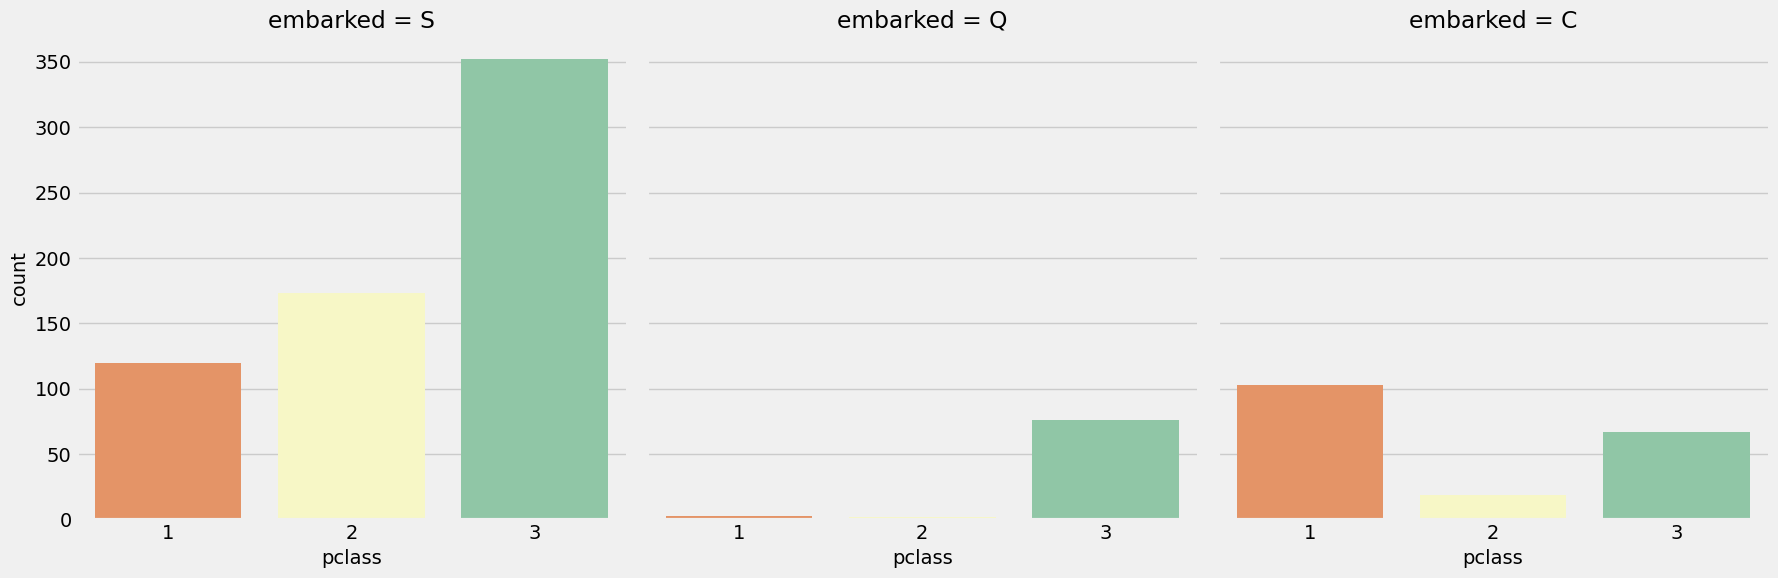

In [80]:
embp = sns.catplot(x="pclass", data=org_train, height=6, kind="count", palette="Spectral", col='embarked')
embp = embp.set_ylabels("count")

- embarked 에 따라 pclass 의 수가 다르고 pclass 3이 많은 'S' 에서 생존률이 낮다.

Text(0.5, 1.0, 'Survived by embarked')

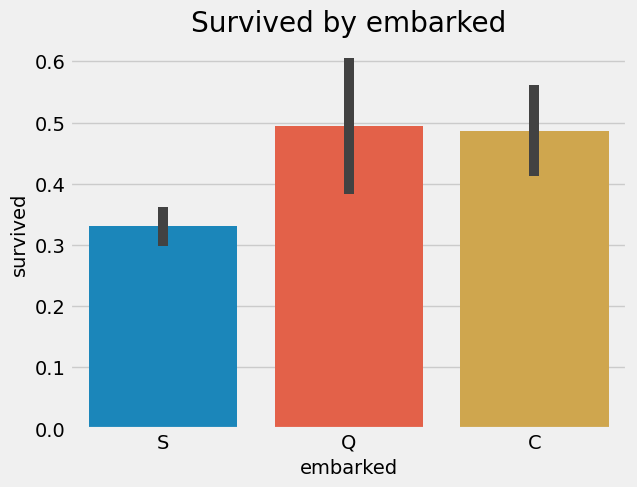

In [81]:
ds = sns.barplot(x = "embarked", y = "survived", data = df_object)
ds.set_title("Survived by embarked")

## Pivot Table 분석

In [82]:
org_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  916 non-null    int64  
 1   pclass    916 non-null    int64  
 2   name      916 non-null    object 
 3   gender    916 non-null    object 
 4   age       736 non-null    float64
 5   sibsp     916 non-null    int64  
 6   parch     916 non-null    int64  
 7   ticket    916 non-null    object 
 8   fare      916 non-null    float64
 9   cabin     198 non-null    object 
 10  embarked  915 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 78.8+ KB


### pclass 와 gender 의 생존률 평균과 합계

In [83]:
df_pivot = pd.pivot_table(org_train,     # 피벗할 데이터프레임
                     index = 'pclass',   # 행 위치에 들어갈 열
                     columns = 'gender',    # 열 위치에 들어갈 열
                     values = 'survived',     # 데이터로 사용할 열
                     aggfunc = ['mean', 'sum'])   # 데이터 집계함수

df_pivot                

mean              sum     
gender    female      male female male
pclass                                
1       0.990099  0.246032    100   31
2       0.930556  0.073770     67    9
3       0.688312  0.096774    106   33

- 3등석보다 1등석의 생존률이 높은 것을 확인할 수 있다.  
- 등석에 상관없이 남성보다 여성의 생존률이 높은 것을 확인할 수 있다.

In [84]:
df_pivot = pd.pivot_table(org_train,
                     index = ['pclass','gender'],
                     columns = 'survived',
                     values = ['age','fare'],
                     aggfunc = ['mean','max','min'])

df_pivot

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
pclass gender                                                             
1      female  25.000000  36.833333  151.550000  101.404707  25.0  76.0   
       male    41.698718  36.818571   65.659779   80.017887  71.0  80.0   
2      female  38.000000  27.453846   16.700000   21.636131  57.0  60.0   
       male    31.880952  17.437500   19.703944   21.734722  70.0  62.0   
3      female  23.000000  20.988310   19.345662   13.715490  48.0  63.0   
       male    26.154136  24.360000   12.398280   15.583206  74.0  45.0   

                                   min                          
                 fare              age           fare           
survived            0         1      0      1       0        1  
pclass gender                                                   
1      female  151.55  512.3292  25.00  14.00  151.55  25.7000  
       male    263.00  512.3292   6.00   0.92    0.00  26.2875  
2      female   26.00   65.0000  24.00   2.00   10.50  10.5000  
       male     73.50   36.7500   2.00   0.67    0.00  10.5000  
3      female   69.55   69.5500   2.00   0.17    6.75   6.9500  
       male     69.55   56.4958   0.33   1.00    0.00   0.0000

# Split train and test

In [85]:
from sklearn.model_selection import train_test_split

X = org_train.drop(['survived'], axis=1)
y = org_train['survived']

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=org_train['survived'], random_state=args.random_state)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((732, 10), (184, 10), (732,), (184,))

# Base Model V0

## Copy Dataset

In [86]:
train = X_tr.copy()
test = X_te.copy()
org_te = org_test.copy()

dfs = [train, test, org_te]

## Missing Values

### Null check

In [87]:
train.isnull().sum().sort_values(ascending=False)

cabin       574
age         143
pclass        0
name          0
gender        0
sibsp         0
parch         0
ticket        0
fare          0
embarked      0
dtype: int64

<Axes: >

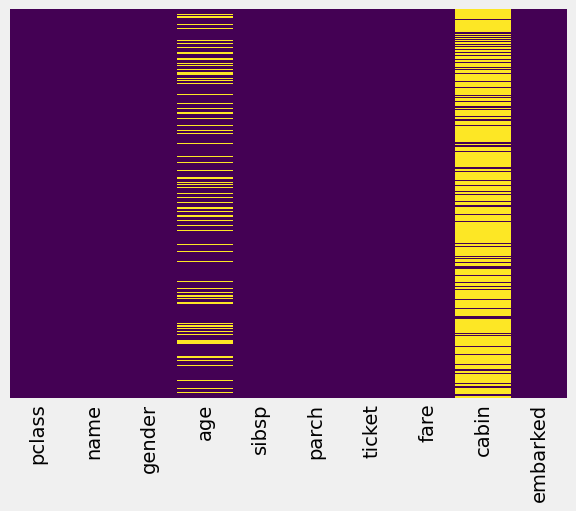

In [88]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [89]:
test.isnull().sum().sort_values(ascending=False)

cabin       144
age          37
embarked      1
pclass        0
name          0
gender        0
sibsp         0
parch         0
ticket        0
fare          0
dtype: int64

<Axes: >

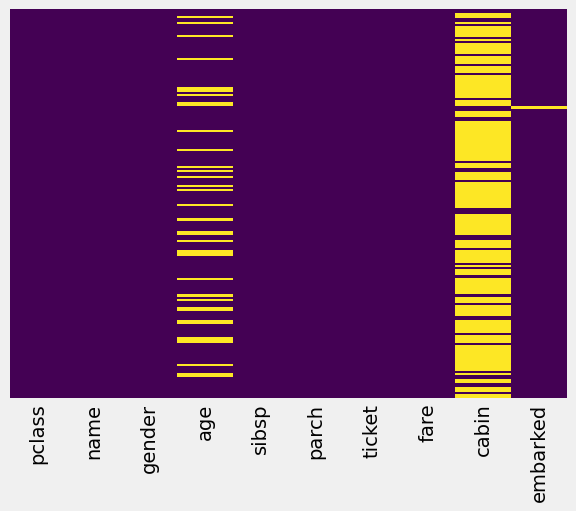

In [90]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

### drop ticket

In [91]:
print(f'before: {train.shape} / {test.shape} / {org_te.shape}')

for df in dfs:
    df.drop('ticket', axis=1, inplace=True)

print(f'after: {train.shape} / {test.shape} / {org_te.shape}')
train.info()

before: (732, 10) / (184, 10) / (393, 10)
after: (732, 9) / (184, 9) / (393, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 38 to 277
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    732 non-null    int64  
 1   name      732 non-null    object 
 2   gender    732 non-null    object 
 3   age       589 non-null    float64
 4   sibsp     732 non-null    int64  
 5   parch     732 non-null    int64  
 6   fare      732 non-null    float64
 7   cabin     158 non-null    object 
 8   embarked  732 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 57.2+ KB


### Random Sampling - age

In [92]:
def random_sampling(df:pd.DataFrame):
    # random sampling
    random_sampling = (df['age'].dropna().sample(df['age'].isnull().sum()))
    random_sampling.index = df[lambda x: x['age'].isnull()].index # index 부여

    # NA imputation
    df.loc[df['age'].isnull(), 'age'] = random_sampling

    # 확인
    print("After random sampling = ", df['age'].isnull().sum())
    
for df in dfs:
    random_sampling(df)

After random sampling =  0
After random sampling =  0
After random sampling =  0


In [93]:
train['age'].isnull().sum(), test['age'].isnull().sum(), org_te['age'].isnull().sum()

(0, 0, 0)

### Random Sampling - fare

In [94]:
def random_sampling(df:pd.DataFrame):
    # random sampling
    random_sampling = (df['fare'].dropna().sample(df['fare'].isnull().sum()))
    random_sampling.index = df[lambda x: x['fare'].isnull()].index # index 부여

    # NA imputation
    df.loc[df['fare'].isnull(), 'fare'] = random_sampling

    # 확인
    print("After random sampling = ", df['fare'].isnull().sum())
    
for df in dfs:
    random_sampling(df)

After random sampling =  0
After random sampling =  0
After random sampling =  0


In [95]:
train['fare'].isnull().sum(), test['fare'].isnull().sum(), org_te['fare'].isnull().sum()

(0, 0, 0)

### Fill Null - embarked

In [96]:
for df in dfs:
    embarked_mode = df['embarked'].mode().values[0]
    df['embarked'].fillna(embarked_mode, inplace=True)

In [97]:
train['embarked'].isnull().sum(), test['embarked'].isnull().sum(), org_te['embarked'].isnull().sum()

(0, 0, 0)

### Add Deck from cabin

In [98]:
for df in dfs:
    df['deck'] = df['cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'unknown')
    df.drop(['cabin'], axis=1, inplace=True)

In [99]:
train['deck'].unique()

array(['unknown', 'B', 'C', 'E', 'D', 'F', 'G', 'A', 'T'], dtype=object)

In [100]:
train['deck'].isnull().sum(), test['deck'].isnull().sum(), org_te['deck'].isnull().sum()

(0, 0, 0)

### After fill Null

In [101]:
train.isnull().sum().sum(), test.isnull().sum().sum(), org_te.isnull().sum().sum()

(0, 0, 0)

In [102]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,B
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown


In [103]:
train.columns

Index(['pclass', 'name', 'gender', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'deck'],
      dtype='object')

## Preprocessing

### name

#### Add title from name

In [104]:
for df in dfs:
    df['title'] = df.name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [105]:
train['title'].unique(), test['title'].unique(), org_te['title'].unique()

(array(['Mr', 'Mrs', 'Miss', 'Master', 'Mlle', 'Major', 'Sir', 'Capt',
        'Ms', 'Rev', 'Col', 'Dr', 'Jonkheer'], dtype=object),
 array(['Mr', 'Dr', 'Mrs', 'Miss', 'Master', 'Rev', 'Countess', 'Don'],
       dtype=object),
 array(['Miss', 'Mrs', 'Mr', 'Master', 'Rev', 'Dona', 'Dr', 'Lady', 'Mme',
        'Mlle', 'Col', 'Ms'], dtype=object))

In [106]:
train['title'].value_counts()

Mr          423
Miss        145
Mrs         117
Master       30
Rev           4
Col           3
Dr            3
Major         2
Mlle          1
Sir           1
Capt          1
Ms            1
Jonkheer      1
Name: title, dtype: int64

In [107]:
train_title = train['title'].unique().tolist()
test_title = test['title'].unique().tolist()
org_te_title = org_te['title'].unique().tolist()

In [108]:
title_unique = list(set(train_title + test_title + org_te_title))
title_unique

['Jonkheer',
 'Rev',
 'Master',
 'Countess',
 'Lady',
 'Don',
 'Mr',
 'Mme',
 'Capt',
 'Dr',
 'Major',
 'Miss',
 'Dona',
 'Col',
 'Mrs',
 'Mlle',
 'Ms',
 'Sir']

In [109]:
title_rep = list(set(title_unique) - set(['Mr', 'Mrs', 'Miss', 'Master']))
print(title_rep)

for df in dfs:
    df['title'] = df['title'].replace(title_rep, 'other')
    
train['title'].value_counts()

['Jonkheer', 'Rev', 'Countess', 'Lady', 'Don', 'Mme', 'Capt', 'Dr', 'Major', 'Dona', 'Col', 'Mlle', 'Ms', 'Sir']


Mr        423
Miss      145
Mrs       117
Master     30
other      17
Name: title, dtype: int64

### sibsp and parch

#### Add Family_size from sibsp and parch

In [110]:
for df in dfs:
    df['fsize'] = df['sibsp'] + df['parch'] + 1

In [111]:
train['fsize'].value_counts()

1     448
2     132
3      81
4      20
6      17
5      16
7       8
11      6
8       4
Name: fsize, dtype: int64

In [112]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,fsize
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,1
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,B,Mrs,2
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,2
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,1
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,1


In [113]:
pd.crosstab(train["fsize"], org_train["survived"], margins = True).T

fsize,1,2,3,4,5,6,7,8,11,All
survived,,,,,,,,,,
0,312,59,38,7,11,15,6,4,4,456
1,136,73,43,13,5,2,2,0,2,276
All,448,132,81,20,16,17,8,4,6,732


#### Add sibsp_group

In [114]:
sibsp_range = [-1, 1, 9]
sibsp_labels = ["alone", "together"]

for df in dfs:
    df['sibsp_group'] = pd.cut(df['sibsp'], sibsp_range, labels=sibsp_labels)

In [115]:
train['sibsp_group'].unique(), test['sibsp_group'].unique(), org_te['sibsp_group'].unique()

(['alone', 'together']
 Categories (2, object): ['alone' < 'together'],
 ['alone', 'together']
 Categories (2, object): ['alone' < 'together'],
 ['alone', 'together']
 Categories (2, object): ['alone' < 'together'])

#### Add parch_group

In [116]:
train['parch'].unique()

array([0, 2, 1, 5, 4, 3, 9, 6])

In [117]:
pd.crosstab(train["parch"], org_train["survived"], margins = True).T

parch,0,1,2,3,4,5,6,9,All
survived,,,,,,,,,
0,370,45,31,3,3,2,2,0,456
1,199,44,27,3,1,1,0,1,276
All,569,89,58,6,4,3,2,1,732


In [118]:
parch_range = [-1, 1, 10]
parch_labels = ["alone", "together"]

for df in dfs:
    df['parch_group'] = pd.cut(df['parch'], parch_range, labels=parch_labels)

In [119]:
train['parch_group'].unique(), test['parch_group'].unique(), org_te['parch_group'].unique()

(['alone', 'together']
 Categories (2, object): ['alone' < 'together'],
 ['alone', 'together']
 Categories (2, object): ['alone' < 'together'],
 ['alone', 'together']
 Categories (2, object): ['alone' < 'together'])

### age

#### Add sub_age from age

In [120]:
for df in dfs:
    df['sub_age'] = df['age'] // 10

In [121]:
train['sub_age'].value_counts(), test['sub_age'].value_counts(), org_te['sub_age'].value_counts()

(2.0    241
 3.0    173
 1.0    103
 4.0     88
 0.0     51
 5.0     40
 6.0     25
 7.0     10
 8.0      1
 Name: sub_age, dtype: int64,
 2.0    61
 3.0    40
 4.0    28
 1.0    23
 0.0    20
 5.0    11
 6.0     1
 Name: sub_age, dtype: int64,
 2.0    120
 3.0     77
 1.0     59
 4.0     48
 5.0     38
 0.0     34
 6.0     17
 Name: sub_age, dtype: int64)

In [122]:
train['sub_age'].unique(), test['sub_age'].unique(), org_te['sub_age'].unique()

(array([1., 2., 4., 3., 5., 0., 6., 7., 8.]),
 array([2., 4., 3., 0., 1., 5., 6.]),
 array([1., 3., 6., 4., 2., 0., 5.]))

In [123]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,fsize,sibsp_group,parch_group,sub_age
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,1,alone,alone,1.0
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,B,Mrs,2,alone,alone,1.0
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,2,alone,alone,2.0
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,1,alone,alone,4.0
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,1,alone,alone,3.0


#### age_group from age

In [124]:
age_range = [0, 5, 12, 18, 29, 49, 64, 100]
age_labels = ["baby", "child", "teenager", "adult", "middle", "senior", "older"]

pd.cut(train['age'], age_range, labels=age_labels).value_counts(), \
pd.cut(test['age'], age_range, labels=age_labels).value_counts(), \
pd.cut(org_te['age'], age_range, labels=age_labels).value_counts()

(adult       266
 middle      261
 teenager     66
 senior       63
 baby         36
 child        27
 older        13
 Name: age, dtype: int64,
 middle      68
 adult       64
 teenager    19
 senior      12
 baby        11
 child       10
 older        0
 Name: age, dtype: int64,
 adult       130
 middle      125
 senior       51
 teenager     46
 baby         27
 child        10
 older         4
 Name: age, dtype: int64)

In [125]:
age_range = [0, 5, 12, 18, 29, 49, 100]
age_labels = ["bady", "child", "teenager", "adult", "middle", "older"]

for df in dfs:
    df['age_group'] = pd.cut(df['age'], age_range, labels=age_labels)

In [126]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,fsize,sibsp_group,parch_group,sub_age,age_group
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,1,alone,alone,1.0,teenager
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,B,Mrs,2,alone,alone,1.0,teenager
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,2,alone,alone,2.0,adult
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,1,alone,alone,4.0,middle
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,1,alone,alone,3.0,middle


In [127]:
train['age_group'].nunique(), test['age_group'].nunique(), org_te['age_group'].nunique()

(6, 6, 6)

In [128]:
train['age_group'].unique(), test['age_group'].unique(), org_te['age_group'].unique()

(['teenager', 'adult', 'middle', 'older', 'bady', 'child']
 Categories (6, object): ['bady' < 'child' < 'teenager' < 'adult' < 'middle' < 'older'],
 ['adult', 'middle', 'bady', 'child', 'teenager', 'older']
 Categories (6, object): ['bady' < 'child' < 'teenager' < 'adult' < 'middle' < 'older'],
 ['teenager', 'middle', 'older', 'adult', 'bady', 'child']
 Categories (6, object): ['bady' < 'child' < 'teenager' < 'adult' < 'middle' < 'older'])

In [129]:
org_te.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,fsize,sibsp_group,parch_group,sub_age,age_group
passengerid,,,,,,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,8.0292,Q,unknown,Miss,1,alone,alone,1.0,teenager
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,13.0000,S,unknown,Mrs,1,alone,alone,3.0,middle
918,3,"McCarthy, Miss. Catherine Katie""""",female,65.0,0,0,7.7500,Q,unknown,Miss,1,alone,alone,6.0,older
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,41.0,0,0,7.2500,S,unknown,Mr,1,alone,alone,4.0,middle
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,164.8667,S,unknown,Mrs,3,alone,alone,4.0,middle


In [130]:
age_group_mapping = {
    "bady" : 1,
    "child" : 2, 
    "teenager" : 3, 
    "adult" : 4, 
    "middle" : 5, 
    "older" : 6
}

for df in dfs:
    df['age_group'] = df['age_group'].map(age_group_mapping)

In [131]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,fsize,sibsp_group,parch_group,sub_age,age_group
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,1,alone,alone,1.0,3
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,B,Mrs,2,alone,alone,1.0,3
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,2,alone,alone,2.0,4
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,1,alone,alone,4.0,5
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,1,alone,alone,3.0,5


In [132]:
train['age_group'].isnull().sum(), test['age_group'].isnull().sum(), org_te['age_group'].isnull().sum()

(0, 0, 0)

#### age_group + sibsp_group

In [133]:
for df in dfs:
    df['sibsp_group_in_subage'] = df.apply(lambda x: x['sibsp_group']+str(int(x['age_group'])), axis=1)

In [134]:
train['sibsp_group_in_subage'].unique(), test['sibsp_group_in_subage'].unique(), org_te['sibsp_group_in_subage'].unique()

(array(['alone3', 'alone4', 'alone5', 'alone6', 'alone1', 'alone2',
        'together4', 'together3', 'together1', 'together5', 'together2',
        'together6'], dtype=object),
 array(['alone4', 'alone5', 'together5', 'alone1', 'together4', 'alone2',
        'alone3', 'alone6', 'together6', 'together1', 'together3',
        'together2'], dtype=object),
 array(['alone3', 'alone5', 'alone6', 'alone4', 'together4', 'together1',
        'together6', 'alone1', 'together5', 'alone2', 'together3',
        'together2'], dtype=object))

In [135]:
train['sibsp_group_in_subage'].nunique(), test['sibsp_group_in_subage'].nunique(), org_te['sibsp_group_in_subage'].nunique()

(12, 12, 12)

In [136]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,fsize,sibsp_group,parch_group,sub_age,age_group,sibsp_group_in_subage
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,1,alone,alone,1.0,3,alone3
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,B,Mrs,2,alone,alone,1.0,3,alone3
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,2,alone,alone,2.0,4,alone4
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,1,alone,alone,4.0,5,alone5
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,1,alone,alone,3.0,5,alone5


#### age scaling

In [137]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(train[['age']])
train[['age_scaled']] = scale.transform(train[['age']])
test[['age_scaled']] = scale.transform(test[['age']])
org_te[['age_scaled']] = scale.transform(org_te[['age']])

In [138]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,fsize,sibsp_group,parch_group,sub_age,age_group,sibsp_group_in_subage,age_scaled
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,1,alone,alone,1.0,3,alone3,-0.823820
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,B,Mrs,2,alone,alone,1.0,3,alone3,-0.892567
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,2,alone,alone,2.0,4,alone4,-0.342586
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,1,alone,alone,4.0,5,alone5,0.826122
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,1,alone,alone,3.0,5,alone5,0.138647


### deck

#### Add deck_group from deck

In [139]:
train['deck'].value_counts(), test['deck'].value_counts(), org_te['deck'].value_counts()

(unknown    574
 C           48
 B           38
 D           25
 E           21
 A           12
 F           10
 G            3
 T            1
 Name: deck, dtype: int64,
 unknown    144
 C           14
 D            7
 B            7
 E            6
 A            3
 F            2
 G            1
 Name: deck, dtype: int64,
 unknown    296
 C           32
 B           20
 E           14
 D           14
 F            9
 A            7
 G            1
 Name: deck, dtype: int64)

In [140]:
train['deck'].unique(), test['deck'].unique(), org_te['deck'].unique()

(array(['unknown', 'B', 'C', 'E', 'D', 'F', 'G', 'A', 'T'], dtype=object),
 array(['C', 'D', 'unknown', 'A', 'E', 'B', 'G', 'F'], dtype=object),
 array(['unknown', 'E', 'B', 'C', 'F', 'D', 'A', 'G'], dtype=object))

In [141]:
for df in dfs:
    df.loc[df['deck'] == 'T', 'deck'] = 'A'
    
    df['deck'] = df['deck'].replace(['A', 'B', 'C'], 'ABC')
    df['deck'] = df['deck'].replace(['D', 'E'], 'DE')
    df['deck'] = df['deck'].replace(['F', 'G'], 'FG')

In [142]:
train['deck'].value_counts(), test['deck'].value_counts(), org_te['deck'].value_counts()

(unknown    574
 ABC         99
 DE          46
 FG          13
 Name: deck, dtype: int64,
 unknown    144
 ABC         24
 DE          13
 FG           3
 Name: deck, dtype: int64,
 unknown    296
 ABC         59
 DE          28
 FG          10
 Name: deck, dtype: int64)

In [143]:
pd.crosstab(train["deck"], train["gender"], margins = True) 

gender,female,male,All
deck,,,
ABC,47,52,99
DE,24,22,46
FG,5,8,13
unknown,188,386,574
All,264,468,732


In [144]:
pd.crosstab(test["deck"], test["gender"], margins = True) 

gender,female,male,All
deck,,,
ABC,8,16,24
DE,7,6,13
FG,3,0,3
unknown,45,99,144
All,63,121,184


In [145]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,fsize,sibsp_group,parch_group,sub_age,age_group,sibsp_group_in_subage,age_scaled
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,1,alone,alone,1.0,3,alone3,-0.823820
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,ABC,Mrs,2,alone,alone,1.0,3,alone3,-0.892567
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,2,alone,alone,2.0,4,alone4,-0.342586
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,1,alone,alone,4.0,5,alone5,0.826122
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,1,alone,alone,3.0,5,alone5,0.138647


#### gender in deck from deck

In [146]:
for df in dfs:
    df['gen_in_deck'] = df['gender'] + "_" + df['deck']

In [147]:
train['gen_in_deck'].isnull().sum(), test['gen_in_deck'].isnull().sum(), org_te['gen_in_deck'].isnull().sum()

(0, 0, 0)

In [148]:
train['gen_in_deck'].value_counts(), test['gen_in_deck'].value_counts()

(male_unknown      386
 female_unknown    188
 male_ABC           52
 female_ABC         47
 female_DE          24
 male_DE            22
 male_FG             8
 female_FG           5
 Name: gen_in_deck, dtype: int64,
 male_unknown      99
 female_unknown    45
 male_ABC          16
 female_ABC         8
 female_DE          7
 male_DE            6
 female_FG          3
 Name: gen_in_deck, dtype: int64)

In [149]:
train['gen_in_deck'].unique(), test['gen_in_deck'].unique(), org_te['gen_in_deck'].unique()

(array(['male_unknown', 'female_ABC', 'female_unknown', 'male_DE',
        'male_ABC', 'female_DE', 'male_FG', 'female_FG'], dtype=object),
 array(['male_ABC', 'female_DE', 'male_unknown', 'female_unknown',
        'female_ABC', 'female_FG', 'male_DE'], dtype=object),
 array(['female_unknown', 'male_unknown', 'male_DE', 'male_ABC',
        'female_FG', 'female_ABC', 'female_DE', 'male_FG'], dtype=object))

In [150]:
train['gen_in_deck'].nunique(), test['gen_in_deck'].nunique(), org_te['gen_in_deck'].nunique()

(8, 7, 8)

In [151]:
gid_mapping = {
    'male_ABC' : 11,
    'male_DE' : 12,
    'male_FG' : 13,
    'male_unknown' : 14, 
    'female_ABC' : 21, 
    'female_DE' : 22,  
    'female_FG' : 23,
    'female_unknown' : 24
}

for df in dfs:
    df['gen_in_deck'] = df['gen_in_deck'].map(gid_mapping)

### fare

#### fare_group

In [152]:
pd.qcut(train['fare'], 4).unique()

[(7.918, 14.458], (30.5, 512.329], (-0.001, 7.918], (14.458, 30.5]]
Categories (4, interval[float64, right]): [(-0.001, 7.918] < (7.918, 14.458] < (14.458, 30.5] < (30.5, 512.329]]

In [153]:
fare_cut = [-0.001, 7.918, 14.458, 30.5, 513]

for i in range(1, len(fare_split)):
    print(i)
    for df in dfs:
        df.loc[(fare_split[i-1]<df['fare'])&(df['fare']<fare_split[i]), 'fare_group'] = i

1
2
3
4


In [154]:
train['fare_group'].isnull().sum(), test['fare_group'].isnull().sum(), org_te['fare_group'].isnull().sum()

(0, 0, 0)

In [155]:
train['fare_group'].unique(), test['fare_group'].unique(), org_te['fare_group'].unique()

(array([2., 4., 1., 3.]), array([3., 4., 1., 2.]), array([2., 1., 4., 3.]))

In [156]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,fsize,sibsp_group,parch_group,sub_age,age_group,sibsp_group_in_subage,age_scaled,gen_in_deck,fare_group
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,1,alone,alone,1.0,3,alone3,-0.823820,14,2.0
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,ABC,Mrs,2,alone,alone,1.0,3,alone3,-0.892567,21,4.0
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,2,alone,alone,2.0,4,alone4,-0.342586,24,2.0
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,1,alone,alone,4.0,5,alone5,0.826122,14,1.0
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,1,alone,alone,3.0,5,alone5,0.138647,14,2.0


#### fare scaling

In [157]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(train[['fare']])
train[['fare_scaled']] = scale.transform(train[['fare']])
test[['fare_scaled']] = scale.transform(test[['fare']])
org_te[['fare_scaled']] = scale.transform(org_te[['fare']])

In [158]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,fsize,sibsp_group,parch_group,sub_age,age_group,sibsp_group_in_subage,age_scaled,gen_in_deck,fare_group,fare_scaled
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,1,alone,alone,1.0,3,alone3,-0.823820,14,2.0,-0.403770
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,ABC,Mrs,2,alone,alone,1.0,3,alone3,-0.892567,21,4.0,0.467868
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,2,alone,alone,2.0,4,alone4,-0.342586,24,2.0,-0.472256
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,1,alone,alone,4.0,5,alone5,0.826122,14,1.0,-0.475129
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,1,alone,alone,3.0,5,alone5,0.138647,14,2.0,-0.472256


### pclass

#### pclass+age_group

In [159]:
for df in dfs:
    df['age_group_in_pclass'] = df.apply(lambda x: str(x['pclass']) + str(x['age_group']), axis=1)

In [160]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,...,sibsp_group,parch_group,sub_age,age_group,sibsp_group_in_subage,age_scaled,gen_in_deck,fare_group,fare_scaled,age_group_in_pclass
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,...,alone,alone,1.0,3,alone3,-0.823820,14,2.0,-0.403770,23
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,ABC,Mrs,...,alone,alone,1.0,3,alone3,-0.892567,21,4.0,0.467868,13
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,...,alone,alone,2.0,4,alone4,-0.342586,24,2.0,-0.472256,34
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,...,alone,alone,4.0,5,alone5,0.826122,14,1.0,-0.475129,35
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,...,alone,alone,3.0,5,alone5,0.138647,14,2.0,-0.472256,35


In [161]:
train['age_group_in_pclass'].unique(), test['age_group_in_pclass'].unique(), org_te['age_group_in_pclass'].unique()

(array(['23', '13', '34', '35', '24', '15', '26', '33', '14', '31', '16',
        '25', '22', '21', '32', '36', '12', '11'], dtype=object),
 array(['14', '15', '25', '31', '35', '24', '34', '32', '33', '11', '22',
        '36', '16', '13', '12', '21', '26'], dtype=object),
 array(['33', '25', '36', '35', '15', '34', '31', '16', '24', '26', '21',
        '13', '14', '11', '32', '22', '23'], dtype=object))

In [162]:
train['age_group_in_pclass'].isnull().sum(), test['age_group_in_pclass'].isnull().sum(), org_te['age_group_in_pclass'].isnull().sum()

(0, 0, 0)

In [163]:
train['age_group_in_pclass'].value_counts(), test['age_group_in_pclass'].value_counts(), org_te['age_group_in_pclass'].value_counts()

(34    163
 35    124
 15     83
 24     65
 25     54
 33     42
 16     41
 14     38
 31     27
 32     19
 36     19
 26     16
 23     14
 13     10
 21      7
 22      5
 12      3
 11      2
 Name: age_group_in_pclass, dtype: int64,
 34    43
 15    26
 35    26
 33    16
 25    16
 24    12
 14     9
 31     9
 16     8
 32     6
 13     3
 12     3
 26     3
 11     1
 22     1
 36     1
 21     1
 Name: age_group_in_pclass, dtype: int64,
 34    84
 35    60
 15    37
 33    33
 16    31
 24    29
 25    28
 14    17
 36    16
 31    14
 21    11
 13     9
 26     8
 32     7
 23     4
 22     3
 11     2
 Name: age_group_in_pclass, dtype: int64)

#### pcalss + fare_group

In [164]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,...,sibsp_group,parch_group,sub_age,age_group,sibsp_group_in_subage,age_scaled,gen_in_deck,fare_group,fare_scaled,age_group_in_pclass
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,...,alone,alone,1.0,3,alone3,-0.823820,14,2.0,-0.403770,23
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,ABC,Mrs,...,alone,alone,1.0,3,alone3,-0.892567,21,4.0,0.467868,13
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,...,alone,alone,2.0,4,alone4,-0.342586,24,2.0,-0.472256,34
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,...,alone,alone,4.0,5,alone5,0.826122,14,1.0,-0.475129,35
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,...,alone,alone,3.0,5,alone5,0.138647,14,2.0,-0.472256,35


In [165]:
for df in dfs:
    df['fare_group_in_pclass'] = df.apply(lambda x: str(x['pclass'])+str(int(x['fare_group'])), axis=1)

In [166]:
train['fare_group_in_pclass'].value_counts()

31    173
14    134
32    111
33     77
22     71
23     65
13     38
34     33
24     20
21      5
11      5
Name: fare_group_in_pclass, dtype: int64

In [167]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,...,parch_group,sub_age,age_group,sibsp_group_in_subage,age_scaled,gen_in_deck,fare_group,fare_scaled,age_group_in_pclass,fare_group_in_pclass
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,...,alone,1.0,3,alone3,-0.823820,14,2.0,-0.403770,23,22
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,ABC,Mrs,...,alone,1.0,3,alone3,-0.892567,21,4.0,0.467868,13,14
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,...,alone,2.0,4,alone4,-0.342586,24,2.0,-0.472256,34,32
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,...,alone,4.0,5,alone5,0.826122,14,1.0,-0.475129,35,31
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,...,alone,3.0,5,alone5,0.138647,14,2.0,-0.472256,35,32


#### gender in pclass

In [168]:
for df in dfs:
    df['gender_in_pclass'] = df.apply(lambda x: x['gender'] + str(x['pclass']), axis=1)

In [169]:
print(f"{train.shape} / {test.shape} / {org_te.shape}")
train.head(5)

(732, 23) / (184, 23) / (393, 23)


,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,...,sub_age,age_group,sibsp_group_in_subage,age_scaled,gen_in_deck,fare_group,fare_scaled,age_group_in_pclass,fare_group_in_pclass,gender_in_pclass
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,...,1.0,3,alone3,-0.823820,14,2.0,-0.403770,23,22,male2
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,ABC,Mrs,...,1.0,3,alone3,-0.892567,21,4.0,0.467868,13,14,female1
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,...,2.0,4,alone4,-0.342586,24,2.0,-0.472256,34,32,female3
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,...,4.0,5,alone5,0.826122,14,1.0,-0.475129,35,31,male3
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,...,3.0,5,alone5,0.138647,14,2.0,-0.472256,35,32,male3


In [170]:
train['gender_in_pclass'].unique(), test['gender_in_pclass'].unique(), org_te['gender_in_pclass'].unique()

(array(['male2', 'female1', 'female3', 'male3', 'female2', 'male1'],
       dtype=object),
 array(['male1', 'female1', 'male2', 'female3', 'male3', 'female2'],
       dtype=object),
 array(['female3', 'female2', 'male3', 'female1', 'male2', 'male1'],
       dtype=object))

## Drop Columns

In [171]:
train.columns

Index(['pclass', 'name', 'gender', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'deck', 'title', 'fsize', 'sibsp_group', 'parch_group', 'sub_age',
       'age_group', 'sibsp_group_in_subage', 'age_scaled', 'gen_in_deck',
       'fare_group', 'fare_scaled', 'age_group_in_pclass',
       'fare_group_in_pclass', 'gender_in_pclass'],
      dtype='object')

In [172]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,deck,title,...,sub_age,age_group,sibsp_group_in_subage,age_scaled,gen_in_deck,fare_group,fare_scaled,age_group_in_pclass,fare_group_in_pclass,gender_in_pclass
38,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.500,S,unknown,Mr,...,1.0,3,alone3,-0.823820,14,2.0,-0.403770,23,22,male2
304,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.000,S,ABC,Mrs,...,1.0,3,alone3,-0.892567,21,4.0,0.467868,13,14,female1
360,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.925,S,unknown,Miss,...,2.0,4,alone4,-0.342586,24,2.0,-0.472256,34,32,female3
506,3,"Rommetvedt, Mr. Knud Paust",male,42.0,0,0,7.775,S,unknown,Mr,...,4.0,5,alone5,0.826122,14,1.0,-0.475129,35,31,male3
695,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.925,S,unknown,Mr,...,3.0,5,alone5,0.138647,14,2.0,-0.472256,35,32,male3


In [173]:
drop_cols = ['name', 'age', 'sibsp', 'parch', 'fare']

for df in dfs:
    df.drop(drop_cols, axis=1, inplace=True)
    
train.head()

,pclass,gender,embarked,deck,title,fsize,sibsp_group,parch_group,sub_age,age_group,sibsp_group_in_subage,age_scaled,gen_in_deck,fare_group,fare_scaled,age_group_in_pclass,fare_group_in_pclass,gender_in_pclass
38,2,male,S,unknown,Mr,1,alone,alone,1.0,3,alone3,-0.823820,14,2.0,-0.403770,23,22,male2
304,1,female,S,ABC,Mrs,2,alone,alone,1.0,3,alone3,-0.892567,21,4.0,0.467868,13,14,female1
360,3,female,S,unknown,Miss,2,alone,alone,2.0,4,alone4,-0.342586,24,2.0,-0.472256,34,32,female3
506,3,male,S,unknown,Mr,1,alone,alone,4.0,5,alone5,0.826122,14,1.0,-0.475129,35,31,male3
695,3,male,S,unknown,Mr,1,alone,alone,3.0,5,alone5,0.138647,14,2.0,-0.472256,35,32,male3


## Encoding

### OneHot Encoding

In [174]:
train.isnull().sum().sum(), test.isnull().sum().sum(), org_te.isnull().sum().sum()

(0, 0, 0)

In [175]:
train.head()

,pclass,gender,embarked,deck,title,fsize,sibsp_group,parch_group,sub_age,age_group,sibsp_group_in_subage,age_scaled,gen_in_deck,fare_group,fare_scaled,age_group_in_pclass,fare_group_in_pclass,gender_in_pclass
38,2,male,S,unknown,Mr,1,alone,alone,1.0,3,alone3,-0.823820,14,2.0,-0.403770,23,22,male2
304,1,female,S,ABC,Mrs,2,alone,alone,1.0,3,alone3,-0.892567,21,4.0,0.467868,13,14,female1
360,3,female,S,unknown,Miss,2,alone,alone,2.0,4,alone4,-0.342586,24,2.0,-0.472256,34,32,female3
506,3,male,S,unknown,Mr,1,alone,alone,4.0,5,alone5,0.826122,14,1.0,-0.475129,35,31,male3
695,3,male,S,unknown,Mr,1,alone,alone,3.0,5,alone5,0.138647,14,2.0,-0.472256,35,32,male3


In [176]:
train.columns

Index(['pclass', 'gender', 'embarked', 'deck', 'title', 'fsize', 'sibsp_group',
       'parch_group', 'sub_age', 'age_group', 'sibsp_group_in_subage',
       'age_scaled', 'gen_in_deck', 'fare_group', 'fare_scaled',
       'age_group_in_pclass', 'fare_group_in_pclass', 'gender_in_pclass'],
      dtype='object')

In [177]:
cols = ['pclass', 'gender', 'embarked', 'deck', 'title', 'sibsp_group',
       'parch_group', 'sibsp_group_in_subage', 'gender_in_pclass']

for col in cols:
    for df in dfs:
        print(df[col].unique())
    print()

[2 1 3]
[1 2 3]
[3 2 1]

['male' 'female']
['male' 'female']
['female' 'male']

['S' 'C' 'Q']
['S' 'Q' 'C']
['Q' 'S' 'C']

['unknown' 'ABC' 'DE' 'FG']
['ABC' 'DE' 'unknown' 'FG']
['unknown' 'DE' 'ABC' 'FG']

['Mr' 'Mrs' 'Miss' 'Master' 'other']
['Mr' 'other' 'Mrs' 'Miss' 'Master']
['Miss' 'Mrs' 'Mr' 'Master' 'other']

['alone', 'together']
Categories (2, object): ['alone' < 'together']
['alone', 'together']
Categories (2, object): ['alone' < 'together']
['alone', 'together']
Categories (2, object): ['alone' < 'together']

['alone', 'together']
Categories (2, object): ['alone' < 'together']
['alone', 'together']
Categories (2, object): ['alone' < 'together']
['alone', 'together']
Categories (2, object): ['alone' < 'together']

['alone3' 'alone4' 'alone5' 'alone6' 'alone1' 'alone2' 'together4'
 'together3' 'together1' 'together5' 'together2' 'together6']
['alone4' 'alone5' 'together5' 'alone1' 'together4' 'alone2' 'alone3'
 'alone6' 'together6' 'together1' 'together3' 'together2']
['alon

In [502]:
from sklearn.preprocessing import OneHotEncoder

print(f'before: {train.shape} / {test.shape} / {org_te.shape}')

enc_cols = ['pclass', 'gender', 'embarked', 'deck', 'title', 'sibsp_group',
       'parch_group', 'sibsp_group_in_subage', 'gender_in_pclass']

normal_cols = list(set(train.columns) - set(enc_cols))

enc = OneHotEncoder()

tmp_tr = pd.DataFrame(enc.fit_transform(train[enc_cols]).toarray(), columns = enc.get_feature_names_out())
enc_tr = pd.concat([train[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)], axis=1)

tmp_te = pd.DataFrame(enc.fit_transform(test[enc_cols]).toarray(), columns = enc.get_feature_names_out())
enc_te = pd.concat([test[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)], axis=1)

tmp_org_te = pd.DataFrame(enc.fit_transform(org_te[enc_cols]).toarray(), columns = enc.get_feature_names_out())
enc_org_te = pd.concat([org_te[normal_cols].reset_index(drop=True), tmp_org_te.reset_index(drop=True)], axis=1)

print(f'after: {enc_tr.shape} / {enc_te.shape} / {enc_org_te.shape}')

before: (732, 18) / (184, 18) / (393, 18)
after: (732, 48) / (184, 48) / (393, 48)


In [503]:
enc_tr.head()

,age_group_in_pclass,fsize,age_group,gen_in_deck,fare_group,age_scaled,fare_scaled,sub_age,fare_group_in_pclass,pclass_1,...,sibsp_group_in_subage_together3,sibsp_group_in_subage_together4,sibsp_group_in_subage_together5,sibsp_group_in_subage_together6,gender_in_pclass_female1,gender_in_pclass_female2,gender_in_pclass_female3,gender_in_pclass_male1,gender_in_pclass_male2,gender_in_pclass_male3
0,23,1,3,14,2.0,-0.823820,-0.403770,1.0,22,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,13,2,3,21,4.0,-0.892567,0.467868,1.0,14,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,34,2,4,24,2.0,-0.342586,-0.472256,2.0,32,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,35,1,5,14,1.0,0.826122,-0.475129,4.0,31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,35,1,5,14,2.0,0.138647,-0.472256,3.0,32,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [504]:
enc_tr.isnull().sum().sum(), enc_te.isnull().sum().sum(), enc_org_te.isnull().sum().sum()

(0, 0, 0)

In [505]:
enc_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   age_group_in_pclass              732 non-null    object  
 1   fsize                            732 non-null    int64   
 2   age_group                        732 non-null    category
 3   gen_in_deck                      732 non-null    int64   
 4   fare_group                       732 non-null    float64 
 5   age_scaled                       732 non-null    float64 
 6   fare_scaled                      732 non-null    float64 
 7   sub_age                          732 non-null    float64 
 8   fare_group_in_pclass             732 non-null    object  
 9   pclass_1                         732 non-null    float64 
 10  pclass_2                         732 non-null    float64 
 11  pclass_3                         732 non-null    float64 
 12  gender_f

## Training

In [506]:
enc_tr.shape, enc_te.shape, enc_org_te.shape

((732, 48), (184, 48), (393, 48))

In [507]:
enc_tr.columns

Index(['age_group_in_pclass', 'fsize', 'age_group', 'gen_in_deck',
       'fare_group', 'age_scaled', 'fare_scaled', 'sub_age',
       'fare_group_in_pclass', 'pclass_1', 'pclass_2', 'pclass_3',
       'gender_female', 'gender_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'deck_ABC', 'deck_DE', 'deck_FG', 'deck_unknown',
       'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_other',
       'sibsp_group_alone', 'sibsp_group_together', 'parch_group_alone',
       'parch_group_together', 'sibsp_group_in_subage_alone1',
       'sibsp_group_in_subage_alone2', 'sibsp_group_in_subage_alone3',
       'sibsp_group_in_subage_alone4', 'sibsp_group_in_subage_alone5',
       'sibsp_group_in_subage_alone6', 'sibsp_group_in_subage_together1',
       'sibsp_group_in_subage_together2', 'sibsp_group_in_subage_together3',
       'sibsp_group_in_subage_together4', 'sibsp_group_in_subage_together5',
       'sibsp_group_in_subage_together6', 'gender_in_pclass_female1',
       'gender

In [508]:
drop_columns = ['title_other', 'sibsp_group_in_subage_together1']

enc_tr.drop(drop_columns, axis=1, inplace=True)
enc_te.drop(drop_columns, axis=1, inplace=True)
enc_org_te.drop(drop_columns, axis=1, inplace=True)

In [509]:
enc_tr.columns

Index(['age_group_in_pclass', 'fsize', 'age_group', 'gen_in_deck',
       'fare_group', 'age_scaled', 'fare_scaled', 'sub_age',
       'fare_group_in_pclass', 'pclass_1', 'pclass_2', 'pclass_3',
       'gender_female', 'gender_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'deck_ABC', 'deck_DE', 'deck_FG', 'deck_unknown',
       'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs',
       'sibsp_group_alone', 'sibsp_group_together', 'parch_group_alone',
       'parch_group_together', 'sibsp_group_in_subage_alone1',
       'sibsp_group_in_subage_alone2', 'sibsp_group_in_subage_alone3',
       'sibsp_group_in_subage_alone4', 'sibsp_group_in_subage_alone5',
       'sibsp_group_in_subage_alone6', 'sibsp_group_in_subage_together2',
       'sibsp_group_in_subage_together3', 'sibsp_group_in_subage_together4',
       'sibsp_group_in_subage_together5', 'sibsp_group_in_subage_together6',
       'gender_in_pclass_female1', 'gender_in_pclass_female2',
       'gender_in_pclass_female3', '

### DecisionTree

In [510]:
from sklearn.tree import DecisionTreeClassifier

modelV0 = DecisionTreeClassifier(random_state=args.random_state).fit(enc_tr, y_tr)

print(f'{enc_tr.shape} / {y_tr.shape}')

(732, 46) / (732,)


In [511]:
score_tr = modelV0.score(enc_tr, y_tr)
score_te = modelV0.score(enc_te, y_te) 

score_tr, score_te

(0.9931693989071039, 0.7989130434782609)

In [512]:
from sklearn.metrics import roc_curve, auc 

y_pred = modelV0.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.7849624060150376


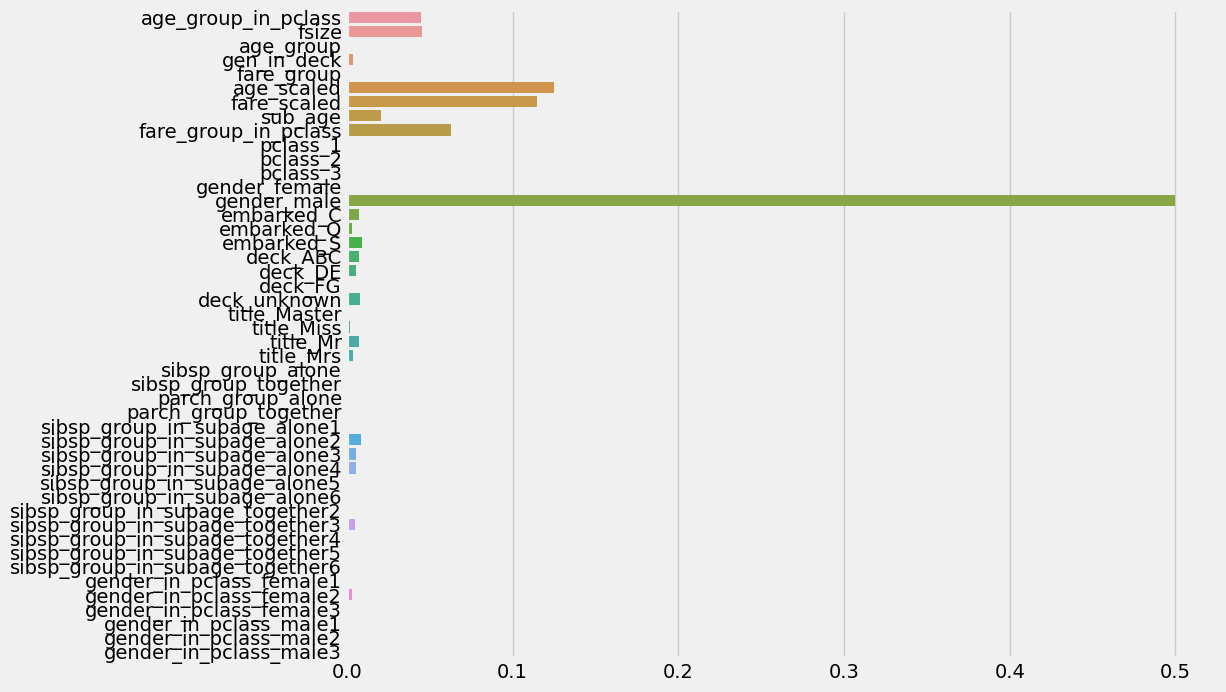

In [513]:
plt.figure(figsize=(10,8))
sns.barplot(x=modelV0.feature_importances_, y=enc_tr.columns)
plt.show()

#### submission

In [419]:
submission = pd.read_csv(args.submission_csv)
print(f'{submission.shape}')
submission.head()

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [420]:
test_pred = modelV0.predict_proba(enc_org_te)[:, 1]
test_pred.shape

(393,)

In [421]:
submission['survived'] = test_pred
submission.head()

,passengerid,survived
0,916,1.0
1,917,1.0
2,918,1.0
3,919,0.0
4,920,1.0


In [190]:
# submission.to_csv(args.default_path+"submission_reretry_1.csv", header=True, index=False)

### DecisionTree + Standard Scaler

In [192]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(enc_tr)
X_tr_std = std.transform(enc_tr)
X_te_std = std.transform(enc_te)

modelV0_s = DecisionTreeClassifier(random_state=args.random_state).fit(X_tr_std, y_tr)

score_tr_s = modelV0_s.score(X_tr_std, y_tr)
score_te_s = modelV0_s.score(enc_te, y_te)

score_tr_s, score_te_s

(0.9931693989071039, 0.6032608695652174)

### DecisionTree + MinMax Scaler

In [193]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(enc_tr)
X_tr_mms = mms.transform(enc_tr)
X_te_mms = mms.transform(enc_te)

modelV0_mm = DecisionTreeClassifier(random_state=args.random_state).fit(X_tr_mms, y_tr)

score_tr_mm = modelV0_mm.score(enc_tr, y_tr)
score_te_mm = modelV0_mm.score(enc_te, y_te)

score_tr_mm, score_te_mm

(0.45491803278688525, 0.41304347826086957)

### DecisionTree + Robust Scaler

In [194]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_tr_rb = rbs.fit_transform(enc_tr)
X_te_rb = rbs.transform(enc_te)

modelV0_rb = DecisionTreeClassifier(random_state=args.random_state).fit(X_tr_rb, y_tr)

score_tr_rb = modelV0_rb.score(X_tr_rb, y_tr)
score_te_rb = modelV0_rb.score(X_te_rb, y_te)

score_tr_rb, score_te_rb

(0.9931693989071039, 0.7663043478260869)

### XGBoosting

In [514]:
enc_tr.head()

,age_group_in_pclass,fsize,age_group,gen_in_deck,fare_group,age_scaled,fare_scaled,sub_age,fare_group_in_pclass,pclass_1,...,sibsp_group_in_subage_together3,sibsp_group_in_subage_together4,sibsp_group_in_subage_together5,sibsp_group_in_subage_together6,gender_in_pclass_female1,gender_in_pclass_female2,gender_in_pclass_female3,gender_in_pclass_male1,gender_in_pclass_male2,gender_in_pclass_male3
0,23,1,3,14,2.0,-0.823820,-0.403770,1.0,22,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,13,2,3,21,4.0,-0.892567,0.467868,1.0,14,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,34,2,4,24,2.0,-0.342586,-0.472256,2.0,32,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,35,1,5,14,1.0,0.826122,-0.475129,4.0,31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,35,1,5,14,2.0,0.138647,-0.472256,3.0,32,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [515]:
enc_tr.select_dtypes(exclude=np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age_group_in_pclass   732 non-null    object  
 1   age_group             732 non-null    category
 2   fare_group_in_pclass  732 non-null    object  
dtypes: category(1), object(2)
memory usage: 12.5+ KB


In [516]:
enc_tr['fare_group_in_pclass'] = enc_tr['fare_group_in_pclass'].astype('int64')
enc_tr['age_group_in_pclass'] = enc_tr['age_group_in_pclass'].astype('int64')
enc_tr['age_group'] = enc_tr['age_group'].astype('int64')

enc_te['fare_group_in_pclass'] = enc_te['fare_group_in_pclass'].astype('int64')
enc_te['age_group_in_pclass'] = enc_te['age_group_in_pclass'].astype('int64')
enc_te['age_group'] = enc_te['age_group'].astype('int64')

enc_org_te['fare_group_in_pclass'] = enc_org_te['fare_group_in_pclass'].astype('int64')
enc_org_te['age_group_in_pclass'] = enc_org_te['age_group_in_pclass'].astype('int64')
enc_org_te['age_group'] = enc_org_te['age_group'].astype('int64')

In [517]:
enc_tr.columns

Index(['age_group_in_pclass', 'fsize', 'age_group', 'gen_in_deck',
       'fare_group', 'age_scaled', 'fare_scaled', 'sub_age',
       'fare_group_in_pclass', 'pclass_1', 'pclass_2', 'pclass_3',
       'gender_female', 'gender_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'deck_ABC', 'deck_DE', 'deck_FG', 'deck_unknown',
       'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs',
       'sibsp_group_alone', 'sibsp_group_together', 'parch_group_alone',
       'parch_group_together', 'sibsp_group_in_subage_alone1',
       'sibsp_group_in_subage_alone2', 'sibsp_group_in_subage_alone3',
       'sibsp_group_in_subage_alone4', 'sibsp_group_in_subage_alone5',
       'sibsp_group_in_subage_alone6', 'sibsp_group_in_subage_together2',
       'sibsp_group_in_subage_together3', 'sibsp_group_in_subage_together4',
       'sibsp_group_in_subage_together5', 'sibsp_group_in_subage_together6',
       'gender_in_pclass_female1', 'gender_in_pclass_female2',
       'gender_in_pclass_female3', '

In [530]:
from xgboost import XGBClassifier, plot_importance

hp = {
    "random_state" : args.random_state,
    "max_depth" : 3,
    "learning_rate" : 0.0010631668051090453,
    "n_estimators" : 1200,
    "subsample" : 0.5416303010687865
}

xgb = XGBClassifier(**hp).fit(enc_tr, y_tr)
print(f'훈련용 평가지표: {xgb.score(enc_tr, y_tr)} / 테스트용 평가지표: {xgb.score(enc_te, y_te)}')

훈련용 평가지표: 0.8756830601092896 / 테스트용 평가지표: 0.8641304347826086


In [531]:
from sklearn.metrics import roc_curve, auc 

# xgb
pred = xgb.predict_proba(enc_te)[:, 1]
fpr, tpr, _ = roc_curve(y_te, pred)
auc(fpr, tpr)

0.8810150375939849

<Figure size 2000x2000 with 0 Axes>

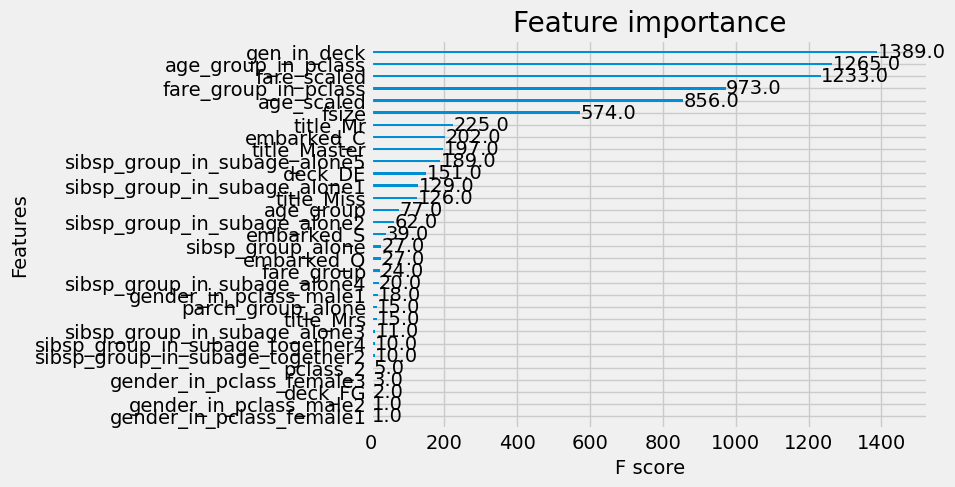

In [532]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plot_importance(xgb)
plt.show()

#### submission

In [521]:
submission = pd.read_csv(args.submission_csv)
print(f'{submission.shape}')
submission.head()

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [522]:
xgb_test_pred = xgb.predict_proba(enc_org_te)[:, 1]
xgb_test_pred.shape

(393,)

In [523]:
submission['survived'] = xgb_test_pred
submission.head()

,passengerid,survived
0,916,0.602963
1,917,0.774322
2,918,0.713037
3,919,0.222997
4,920,0.793289


In [525]:
# submission.to_csv(args.default_path+"submission_reretry_18.csv", header=True, index=False)

### Gradient Boosting

In [536]:
from sklearn.ensemble import GradientBoostingClassifier

hp = {
    "random_state" : args.random_state,
    "max_depth" : 3,
    "learning_rate" : 0.0010631668051090453,
    "n_estimators" : 1200,
    "subsample" : 0.5416303010687865
}

gbc = GradientBoostingClassifier(**hp).fit(enc_tr, y_tr)
print(f'훈련용 평가지표: {gbc.score(enc_tr, y_tr)} / 테스트용 평가지표: {gbc.score(enc_te, y_te)}')

훈련용 평가지표: 0.8866120218579235 / 테스트용 평가지표: 0.8586956521739131


In [539]:
from sklearn.metrics import roc_curve, auc 

y_pred_dtc = gbc.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_dtc)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.875501253132832


#### StratifiedKFold

In [224]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

gbc_kf = GradientBoostingClassifier(random_state=args.random_state).fit(enc_tr, y_tr)

In [225]:
from sklearn.model_selection import cross_val_score

# 교차 검증
scores = cross_val_score(gbc_kf, enc_tr, y_tr, scoring='accuracy', cv=5)
print(f'각 검증 별 점수: \n{pd.Series(scores)}')
print(f'교차 검증 평균 점수: {np.mean(scores)}')

각 검증 별 점수: 
0    0.877551
1    0.884354
2    0.863014
3    0.869863
4    0.890411
dtype: float64
교차 검증 평균 점수: 0.8770384866275277


In [210]:
from sklearn.model_selection import cross_validate

# 교차 검증
result = cross_validate(gbc_kf, enc_tr, y_tr, scoring='accuracy', cv=5, return_train_score=True)
print(f'각 검증 결과: \n: {pd.DataFrame(result)}')

각 검증 결과: 
:    fit_time  score_time  test_score  train_score
0  0.115253    0.001986    0.877551     0.935043
1  0.117664    0.001662    0.884354     0.928205
2  0.097232    0.001438    0.863014     0.935154
3  0.097340    0.001473    0.869863     0.935154
4  0.097385    0.001408    0.890411     0.935154


#### submission

In [540]:
submission = pd.read_csv(args.submission_csv)
print(f'{submission.shape}')
submission.head()

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [541]:
gbc_test_pred = gbc.predict_proba(enc_org_te)[:, 1]
gbc_test_pred.shape

(393,)

In [542]:
submission['survived'] = gbc_test_pred
submission.head()

,passengerid,survived
0,916,0.607182
1,917,0.768539
2,918,0.726663
3,919,0.160466
4,920,0.793746


In [544]:
# submission.to_csv(args.default_path+"submission_reretry_19.csv", header=True, index=False)

# 교차 검증

## Gradient Boosting

In [534]:
enc_tr.shape, enc_te.shape, org_te.shape, y_tr.shape, y_te.shape

((732, 46), (184, 46), (393, 18), (732,), (184,))

In [535]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd

In [217]:
# 교차 검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=args.random_state)

In [218]:
n_iter = 0
accuracy_lst = []

for train_index, valid_index in skf.split(enc_tr, y_tr):
    n_iter += 1
    
    # 학습용, 검증용 데이터 구성
    label_train = y_tr.iloc[train_index]
    label_valid = y_tr.iloc[valid_index]

    train_x, valid_x = enc_tr.iloc[train_index], enc_tr.iloc[valid_index]
    train_y, valid_y = y_tr.iloc[train_index], y_tr.iloc[valid_index]

    gbc.fit(train_x, train_y)
    
    pred = gbc.predict(valid_x)
    
    accuracy = np.round(accuracy_score(valid_y, pred), 4)
    accuracy_lst.append(accuracy)
    print(f'{n_iter} 번째 Stratified Stratified K-Fold 정확도: {accuracy}, 학습데이터 label 분포: {label_train.value_counts()}, 검증데이터 label 분포: {label_valid.value_counts()}')
    
# 최종 평가
print('-'*50)
print(f'교차 검증 정확도: {np.mean(accuracy_lst)} / 모델 평가: {gbc.score(enc_te, y_te)}')

1 번째 Stratified Stratified K-Fold 정확도: 0.8912, 학습데이터 label 분포: 0    364
1    221
Name: survived, dtype: int64, 검증데이터 label 분포: 0    92
1    55
Name: survived, dtype: int64
2 번째 Stratified Stratified K-Fold 정확도: 0.8844, 학습데이터 label 분포: 0    365
1    220
Name: survived, dtype: int64, 검증데이터 label 분포: 0    91
1    56
Name: survived, dtype: int64
3 번째 Stratified Stratified K-Fold 정확도: 0.8493, 학습데이터 label 분포: 0    365
1    221
Name: survived, dtype: int64, 검증데이터 label 분포: 0    91
1    55
Name: survived, dtype: int64
4 번째 Stratified Stratified K-Fold 정확도: 0.863, 학습데이터 label 분포: 0    365
1    221
Name: survived, dtype: int64, 검증데이터 label 분포: 0    91
1    55
Name: survived, dtype: int64
5 번째 Stratified Stratified K-Fold 정확도: 0.8973, 학습데이터 label 분포: 0    365
1    221
Name: survived, dtype: int64, 검증데이터 label 분포: 0    91
1    55
Name: survived, dtype: int64
--------------------------------------------------
교차 검증 정확도: 0.8770399999999998 / 모델 평가: 0.8369565217391305


In [219]:
from sklearn.model_selection import cross_val_predict

# 교차 검증
predicts = cross_val_predict(gbc, enc_tr, y_tr, cv=5)
print(f'각 예측 결과과: \n:{pd.Series(predicts)}')

각 예측 결과과: 
:0      0
1      1
2      1
3      0
4      0
      ..
727    0
728    0
729    0
730    0
731    0
Length: 732, dtype: int64


In [220]:
from sklearn.model_selection import cross_val_score

# 교차 검증
scores = cross_val_score(gbc, enc_tr, y_tr, scoring='accuracy', cv=5)
print(f'각 검증 별 점수: \n{pd.Series(scores)}')
print(f'교차 검증 평균 점수: {np.mean(scores)}')

각 검증 별 점수: 
0    0.877551
1    0.884354
2    0.863014
3    0.869863
4    0.890411
dtype: float64
교차 검증 평균 점수: 0.8770384866275277


In [221]:
from sklearn.model_selection import cross_validate

# 교차 검증
result = cross_validate(gbc, enc_tr, y_tr, scoring='accuracy', cv=5, return_train_score=True)
print(f'각 검증 결과: \n: {pd.DataFrame(result)}')

각 검증 결과: 
:    fit_time  score_time  test_score  train_score
0  0.116382    0.001865    0.877551     0.935043
1  0.101437    0.001503    0.884354     0.928205
2  0.095194    0.001382    0.863014     0.935154
3  0.095188    0.001360    0.869863     0.935154
4  0.097268    0.001515    0.890411     0.935154


## XGBoosting

In [545]:
enc_tr.shape, enc_te.shape, org_te.shape, y_tr.shape, y_te.shape

((732, 46), (184, 46), (393, 18), (732,), (184,))

In [546]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd

In [547]:
# 교차 검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=args.random_state)

In [548]:
n_iter = 0
accuracy_lst = []

for train_index, valid_index in skf.split(enc_tr, y_tr):
    n_iter += 1
    
    # 학습용, 검증용 데이터 구성
    label_train = y_tr.iloc[train_index]
    label_valid = y_tr.iloc[valid_index]

    train_x, valid_x = enc_tr.iloc[train_index], enc_tr.iloc[valid_index]
    train_y, valid_y = y_tr.iloc[train_index], y_tr.iloc[valid_index]

    xgb.fit(train_x, train_y)
    
    pred = xgb.predict(valid_x)
    
    accuracy = np.round(accuracy_score(valid_y, pred), 4)
    accuracy_lst.append(accuracy)
    print(f'{n_iter} 번째 Stratified Stratified K-Fold 정확도: {accuracy}, 학습데이터 label 분포: {label_train.value_counts()}, 검증데이터 label 분포: {label_valid.value_counts()}')
    
# 최종 평가
print('-'*50)
print(f'교차 검증 정확도: {np.mean(accuracy_lst)} / 모델 평가: {gbc.score(enc_te, y_te)}')

1 번째 Stratified Stratified K-Fold 정확도: 0.8639, 학습데이터 label 분포: 0    364
1    221
Name: survived, dtype: int64, 검증데이터 label 분포: 0    92
1    55
Name: survived, dtype: int64
2 번째 Stratified Stratified K-Fold 정확도: 0.8776, 학습데이터 label 분포: 0    365
1    220
Name: survived, dtype: int64, 검증데이터 label 분포: 0    91
1    56
Name: survived, dtype: int64
3 번째 Stratified Stratified K-Fold 정확도: 0.8356, 학습데이터 label 분포: 0    365
1    221
Name: survived, dtype: int64, 검증데이터 label 분포: 0    91
1    55
Name: survived, dtype: int64
4 번째 Stratified Stratified K-Fold 정확도: 0.8699, 학습데이터 label 분포: 0    365
1    221
Name: survived, dtype: int64, 검증데이터 label 분포: 0    91
1    55
Name: survived, dtype: int64
5 번째 Stratified Stratified K-Fold 정확도: 0.8973, 학습데이터 label 분포: 0    365
1    221
Name: survived, dtype: int64, 검증데이터 label 분포: 0    91
1    55
Name: survived, dtype: int64
--------------------------------------------------
교차 검증 정확도: 0.8688600000000001 / 모델 평가: 0.8586956521739131


In [549]:
from sklearn.model_selection import cross_val_predict

# 교차 검증
predicts = cross_val_predict(xgb, enc_tr, y_tr, cv=5)
print(f'각 예측 결과과: \n:{pd.Series(predicts)}')

각 예측 결과과: 
:0      0
1      1
2      1
3      0
4      0
      ..
727    0
728    0
729    0
730    0
731    0
Length: 732, dtype: int64


In [552]:
from sklearn.model_selection import cross_val_score

# 교차 검증
scores = cross_val_score(xgb, enc_tr, y_tr, scoring='accuracy', cv=5)
print(f'각 검증 별 점수: \n{pd.Series(scores)}')
print(f'교차 검증 평균 점수: {np.mean(scores)}')

각 검증 별 점수: 
0    0.850340
1    0.870748
2    0.863014
3    0.856164
4    0.910959
dtype: float64
교차 검증 평균 점수: 0.870245084335104


In [553]:
from sklearn.model_selection import cross_validate

# 교차 검증
result = cross_validate(xgb, enc_tr, y_tr, scoring='accuracy', cv=5, return_train_score=True)
print(f'각 검증 결과: \n: {pd.DataFrame(result)}')

각 검증 결과: 
:    fit_time  score_time  test_score  train_score
0  1.352461    0.004937    0.850340     0.882051
1  1.226638    0.004035    0.870748     0.878632
2  1.234078    0.004015    0.863014     0.889078
3  1.218748    0.004451    0.856164     0.877133
4  1.293261    0.004174    0.910959     0.873720
